In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd 

In [1]:
!pip install PyPDF2
!pip install rdflib
!pip install owlready2
!pip install pdfplumber
!pip install autocorrect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 5.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 531.9/531.9 kB 9.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.3/27.3 MB 37.7 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for owlready2: filename=owlready2-0.44-cp310-cp310-linux_x86_64.whl size=23520535 sha256=7a22539535f7361afa304890fcbad99ba44786f1f6c47971b1ed41e1066fa1a6
  Stored in directory: /root/.cache/pip/wheels/88/e1/04/583b0743b2907f091204baaa0aef9740f5ba5f3d2f6a5aa00d
Successfully built owlready2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.5/47.5 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 38.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
import PyPDF2
import numpy as np
import pandas as pd
import nltk
import pdfplumber
from autocorrect import Speller
spell = Speller(lang='en')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
import re
import string
from nltk.corpus import stopwords, brown
from nltk.tokenize import word_tokenize, sent_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from spacy.matcher import Matcher 
from spacy.tokens import Span 
from spacy import displacy 
import rdflib
from rdflib	import Namespace
from owlready2 import *

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [3]:
from PyPDF2 import PdfReader,PdfFileWriter

def extract_page(doc,start,end):
  count = len(doc.pages)
  all_text = ''
  for i in range(start,end+1):
      page = doc.pages[i]
      all_text += page.extract_text()
  
  return all_text

### Merging all PMI PROCESSES

Separating The File into Processes, and then separating them into Sentences and cleaning
We need to clean our text data .There are obviously unwanted characters like newline character, hyphen, apostrophes and other speacial characters , that re likely to disturb us later in our work so we need to get rid of them

In [4]:
file_PMI = '/kaggle/input/prm-dataset/practice-standard-project-risk-management.pdf'
pmi = PdfReader(file_PMI)
pmi_pro1 = extract_page(pmi,30,35) #Plan Risk Management
pmi_pro2 = extract_page(pmi,36,41) #Identify Risks
pmi_pro3 = extract_page(pmi,42,47) #Perform Qualitative Risk Analysis
pmi_pro4 = extract_page(pmi,48,53) #Perform Quantitative Risk Analysis
pmi_pro5 = extract_page(pmi,54,61) #Plan Risk Responses
pmi_pro6 = extract_page(pmi,62,67) #Control Risks

In [5]:
import regex
def cleaning_text(textPMI):
    textPMI=textPMI.replace('(cid:129)','',123)
    textPMI=textPMI.replace("©2009 Project Management Institute.","",123)
    textPMI=textPMI.replace("Practice Standard for Project Risk Management","",123)
    textPMI=textPMI.replace("Chapter","",123)
    textPMI=textPMI.replace("CHAPTER","",123)
    textPMI=textPMI.replace("(pmbok   ®  guide  – fourth edition)","",123)
    textPMI=textPMI.replace("of the  pmbok   ®  guide –  fourth edition","",123)
    textPMI = textPMI.replace('   ','')
    textPMI = textPMI.replace("  ", " ")
    textPMI= textPMI.replace("43 8\n 8 \n PLAN RISK RESPONSES", "8. PLAN RISK RESPONSES", 123)
    textPMI= textPMI.replace("51 9\n9 \n MONITOR AND CONTROL RISKS", "9. MONITOR AND CONTROL RISKS", 123) 
    textPMI= textPMI.replace("\n 53 9 9 − MONITOR AND CONTROL RISKS\n", "", 123) 
    textPMI= textPMI.replace("ﬁ rst", "first", 123)
    textPMI= textPMI.replace("speciﬁ c", "specific", 123)
    textPMI= textPMI.replace("speciﬁ ed", "specified", 123)
    textPMI= textPMI.replace("identiﬁ ed", "identified", 123)
    textPMI= textPMI.replace("modiﬁ ed", "modified", 123)
    textPMI= textPMI.replace("inﬂ uence", "influence", 123)
    textPMI= textPMI.replace("deﬁ nition", "definition", 123)
    textPMI= textPMI.replace("speciﬁ cally", "specifically", 123)
    textPMI= textPMI.replace("predeﬁ ned", "predefined", 123)
    textPMI= textPMI.replace("ﬁ nish", "finish", 123)
    textPMI= textPMI.replace("fi rst", "first identified", 123)
    textPMI= textPMI.replace("identifi ed", "identified", 123)
    textPMI= textPMI.replace("fi nd", "find", 123)
    textPMI= textPMI.replace("identifi cation", "identification", 123)
    textPMI= textPMI.replace("identiﬁ cation", "identification", 123)
    textPMI= textPMI.replace("Identiﬁ cation", "Identification", 123)
    textPMI= textPMI.replace("ﬁ nd", "find", 123)
    textPMI= textPMI.replace("fi ltering", "filtering", 123)
    textPMI= textPMI.replace("defi ned", "defined", 123)
    textPMI= textPMI.replace("Identifi cation", "Identification", 123)
    textPMI= textPMI.replace("fi t", "fit", 123)
    textPMI= textPMI.replace("ﬁ t", "fit", 123)
    textPMI= textPMI.replace("benefi t", "benefit", 123)
    textPMI= textPMI.replace("beneﬁ t", "benefit", 123)
    textPMI= textPMI.replace("specifi c", "specific", 123)
    textPMI= textPMI.replace("specifi ed", "specified", 123)
    textPMI= textPMI.replace("modifi ed", "modified", 123)
    textPMI= textPMI.replace("defi nition", "definition", 123)
    textPMI= textPMI.replace("inﬂ uenced ", "inﬂuenced ", 123)
    textPMI= textPMI.replace("defi ne", "define", 123)
    textPMI= textPMI.replace("deﬁ ne", "define", 123)
    textPMI= textPMI.replace("specifi es", "specifies", 123)
    textPMI= textPMI.replace("defi nitions ", "definitions", 123)
    textPMI= textPMI.replace("defi nes", "defines", 123)
    textPMI= textPMI.replace("reﬂ ect", "reﬂect", 123)
    textPMI= textPMI.replace("Defi ne", "Define", 123)
    textPMI= textPMI.replace("Specifi c", "Specific", 123)
    textPMI= textPMI.replace("Defi nition", "Definition", 123)
    textPMI= textPMI.replace("specifi c project", "specific project", 123)
    #textPMI=textPMI.sub("\S*", " ", text).strip()
    
    return textPMI




In [6]:
pmi_pro1= cleaning_text(pmi_pro1)
pmi_pro2= cleaning_text(pmi_pro2)
pmi_pro3= cleaning_text(pmi_pro3)
pmi_pro4= cleaning_text(pmi_pro4)
pmi_pro5= cleaning_text(pmi_pro5)
pmi_pro6= cleaning_text(pmi_pro6)

In [8]:
pmi_pro6

'9. MONITOR AND CONTROL RISKS \n The effectiveness of Project Risk Management depends upon the way the approved plans are carried out. \nThese plans should be executed correctly, reviewed, and updated regularly. If this is carried out correctly, the \ninvested effort will be rewarded and future projects will benefit from this project’s experience. \n 9.1 Purpose and Objectives of the Monitor and Control Risks Process \n The primary objectives of risk monitoring and controlling are to track identified risks, monitor residual risks, \nidentify new risks, ensure that risk response plans are executed at the appropriate time, and evaluate their effectiveness throughout the project life cycle. \n In addition to tracking and managing the risk response actions, the effectiveness of all of the Project \nRisk Management processes should be reviewed to provide improvements to the management of the current \nproject as well as future ones. \n For each risk or set of risks for which a contingent re

<h3> Extract Title and Sections </h3>

In [9]:
def extract_titles_and_sections(text):
    lines = text.split('\n')
    doc = {"Section": [], "Title": [], "Corpus": []}
    current_section = None
    current_title = None
    current_corpus = []

    for line in lines:
        line = line.strip()

        # Utilisez une expression régulière pour détecter les numéros de section
        section_match = re.match(r'^(\d+\.\d+(\.\d+)*)\s+(.*?)$', line)
        if section_match:
            if current_section:
                doc["Section"].append(current_section)
                doc["Title"].append(current_title)
                doc["Corpus"].append(' '.join(current_corpus))
            current_section = section_match.group(1)
            current_title = section_match.group(3)
            current_corpus = []
        else:
            current_corpus.append(line)

    # Ajoutez la dernière entrée
    if current_section:
        doc["Section"].append(current_section)
        doc["Title"].append(current_title)
        doc["Corpus"].append(' '.join(current_corpus))

    df = pd.DataFrame(doc)
    return df

df1 = extract_titles_and_sections(pmi_pro1)
df1 = df1.drop(5)
df2 = extract_titles_and_sections(pmi_pro2)
df3= extract_titles_and_sections(pmi_pro3)
df4 = extract_titles_and_sections(pmi_pro4)

In [11]:
import pandas as pd
import re

def extract_titles_and_sections(text):
    lines = text.split('\n')
    doc = {"Section": [], "Title": [], "Corpus": []}
    current_section = None
    current_title = None
    current_corpus = []

    for line in lines:
        line = line.strip()

        # Utilisez une expression régulière pour détecter les numéros de section
        section_match = re.match(r'^(\d+(?:\.\d*)*)\s+(.*?)$', line)#r'^(\d+\.\d+\.*\d*)\s+(.*?)$' (\d+\.*\d*)\s+(.*?)$
        if section_match:
            if current_section:
                doc["Section"].append(current_section)
                doc["Title"].append(current_title)
                doc["Corpus"].append('\n'.join(current_corpus))
            current_section = section_match.group(1)
            current_title = section_match.group(2)
            current_corpus = []
        else:
            if current_section:
                current_corpus.append(line)

    # Ajoutez la dernière entrée
    if current_section:
        doc["Section"].append(current_section)
        doc["Title"].append(current_title)
        doc["Corpus"].append('\n'.join(current_corpus))

    df = pd.DataFrame(doc)
    return df



df5 = extract_titles_and_sections(pmi_pro5)
df6= extract_titles_and_sections(pmi_pro6)

In [12]:
dfs_pmi = [df1, df2, df3, df4, df5, df6]
dfs = pd.concat(dfs_pmi)
dfs.reset_index(drop=True, inplace=True)

In [13]:
#search for figures
dfs['Reference'] = ""
for i in range(len(dfs)):
    result = re.findall(r"Figure [0-9]-[0-9]", dfs["Corpus"][i])
    print(result)
    dfs.at[i, 'Reference'] = result

[]
[]
[]
[]
[]
[]
[]
['Figure 4-1', 'Figure 4-1']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Figure 5-1', 'Figure 5-1']
[]
[]
['Figure 5-2', 'Figure 5-2']
[]
[]
['Figure 6-1']
[]
[]
[]
[]
['Figure 6-2', 'Figure 6-2']
[]
[]
[]
[]
[]
[]
['Figure 7-1', 'Figure 7-1']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Figure 7-2', 'Figure 7-2']
[]
[]
[]
[]
[]
['Figure 8-1', 'Figure 8-1']
[]
[]
[]
[]
[]
[]
[]
[]
['Figure 8-2']
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Figure 8-2']
[]
[]
[]
['Figure 8-2']
[]
['Figure 9-1', 'Figure 9-1']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


In [14]:
#Search for table
dfs['Tables'] = ""

# Recherchez les occurrences de "Table [0-9]-[0-9]" et stockez-les
for i in range(len(dfs)):
    result = re.findall(r"Table [0-9]-[0-9]", dfs["Corpus"][i])
    dfs.at[i, 'Tables'] = result

In [15]:
dfs.head(10)

,Section,Title,Corpus,Reference,Tables
0,4.1,Purpose and Objectives of the Plan Risk Manage...,The objectives of the Plan Risk Management pro...,[],[]
1,4.2,Critical Success Factors for the Plan Risk Man...,The principal criteria for a valid risk manage...,[],[]
2,4.2.1,Identify and Address Barriers to Successful Pr...,The time and effort required to carry out the ...,[],[]
3,4.2.2,Involve Project Stakeholders in Project Risk M...,The project manager needs to involve the proje...,[],[]
4,4.2.3,"Comply with the Organization’s Objectives, Pol...",The feasibility of risk management planning is...,[],[]
5,4.3.1,Planning Sessions,Planning sessions are recommended in order to ...,[],[]
6,4.3.2,Templates,In order to benefit from experience and existi...,[],[]
7,4.4,Documenting the Results of the Plan Risk Manag...,The results of risk management planning are do...,"[Figure 4-1, Figure 4-1]",[]
8,5.1,Purpose and Objectives of the Identify Risks P...,A risk cannot be managed unless it is first id...,[],[]
9,5.2,Critical Success Factors for the Identify Risk...,The practices described in Sections 5.2.1 thro...,[],[]


<h3> Data Cleaning </h3>

In [16]:
import nltk
import re
corpus=[]
nltk.download('stopwords')
import spacy
nlp = spacy.load("en_core_web_sm")
from nltk.corpus import stopwords


sw = set(stopwords.words('english')) -set([
    "you're", "you've", "she's", "it's", 'who', 'whom', 'am',  'is', 'are', 'was', 'were', 'be','been',
    'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing',"a",
    'other', 'some',  'no', 'nor', 'not', 'own', 'same',  's', 't', 'can', 'don', "don't", 'should',
    "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 
    'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", "haven't", 'isn', "isn't",
    'will','such','as', 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't",'can'])
def stopwords(text): 
# Removing words that contain numbers
    text= re.sub("\S*\d\S*", " ", text).strip()
    text =re.sub('https?://\S+|www\.\S+', ' ', text)
    text=re.sub("\d+", " ", text)
    text = [word for word in text.split() if word not in sw]
    j=" ".join(text)
    corpus.append(j)

    #text = re.sub("[^a-zA-^Z]", " ", text)
    return j
def remove_punctuation(text):
    # Créez un tableau de traduction qui exclut le point (.) de la suppression
    translator = str.maketrans('', '', '!?"#$%&\'()*+,-/:;<=>@[\\]^_`{|}~')
    # Retournez le texte sans les autres ponctuations
    return text.translate(translator)


dfs["Corpus"] = dfs["Corpus"].apply(lambda text: text.replace("\nem", " ").replace("™", "'").replace("˚"," ").replace("œ", " ").replace("š"," ").replace("•"," ").replace("®"," "))
dfs["Corpus"] = dfs["Corpus"].str.replace('\n',' ')
dfs["Corpus"] = dfs["Corpus"].str.replace('  ',' ')
dfs["Corpus"] = dfs["Corpus"].str.replace("chapter","",123)
dfs["Corpus"]= dfs["Corpus"].apply(stopwords)
dfs["Corpus"]= dfs["Corpus"].apply(remove_punctuation)
dfs["Corpus"]=dfs["Corpus"].apply(lambda s: s.lower())
dfs["Corpus"]=dfs["Corpus"].apply(lambda s: re.sub("[^a-zA-Z, ]","",s).lstrip().rstrip())
dfs["Corpus"]=dfs["Corpus"].apply(lambda s: " ".join([word.text for word in nlp(s) if not word.pos_ in ["ADV"]]))
dfs["Corpus"]=dfs["Corpus"].apply(lambda s: " ".join([word for word in s.split() if word !="the"]))
dfs["Title"]=dfs["Title"].apply(lambda s: s.lower())
dfs["Title"] = dfs["Title"].str.replace("chapter","",123)
dfs["Title"]=dfs["Title"].apply(lambda s: re.sub("[^a-zA-Z, ]","",s).lstrip().rstrip())
dfs["Title"]=dfs["Title"].apply(lambda s: " ".join([word.text for word in nlp(s) if not word.pos_ in ["ADV"]]))
dfs["Title"]=dfs["Title"].apply(lambda s: " ".join([word for word in s.split() if word !="the"]))

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
dfs["Corpus"][9]

'practices described sections will maximize value effectiveness identify risks process enhance likelihood identifying many risks as practicable'

<h3> Extract Keywords </h3>
By definition, keyword extraction is the automated process of extracting the most relevant information from text using AI and machine learning algorithms. In this part, we will use the most effective methods to extract data:

* YAKE
* RAKE
* TextRank

In [18]:
# we will combine the text and the Corpus 
full_text = dfs['Title']+" "+dfs['Corpus']

# Concatination of the Titles columns ad Corpus column
print("The whole text: ")
full_text[0]
     

The whole text: 


'purpose and objectives of plan risk management process objectives plan risk management process are develop overall risk management strategy project decide risk management processes will be executed integrate project risk management other project management activities effective risk management requires creation a risk management plan this plan describes risk management processes should be carried fit other project management processes on a broader level describes relationships among project risk management general project management management processes rest organization to provide greatest benefit initial risk management planning should be carried early overall planning project corresponding risk management activities integrated overall project management plan risk management plan may need be adapted as needs project stakeholders become clearer change although project risk management processes form integral part overall project management plan a budget terms resources cost time specif

In [19]:
try:
    nltk.data.find('wordnet.zip')
except:
    nltk.download('wordnet', download_dir='/kaggle/working/')
    command = "unzip /kaggle/working/corpora/wordnet.zip -d /kaggle/working/corpora"
    subprocess.run(command.split())
    nltk.data.path.append('/kaggle/working/')
from nltk.stem import SnowballStemmer, WordNetLemmatizer

[nltk_data] Downloading package wordnet to /kaggle/working/...
Archive:  /kaggle/working/corpora/wordnet.zip
   creating: /kaggle/working/corpora/wordnet/
  inflating: /kaggle/working/corpora/wordnet/lexnames  
  inflating: /kaggle/working/corpora/wordnet/data.verb  
  inflating: /kaggle/working/corpora/wordnet/index.adv  
  inflating: /kaggle/working/corpora/wordnet/adv.exc  
  inflating: /kaggle/working/corpora/wordnet/index.verb  
  inflating: /kaggle/working/corpora/wordnet/cntlist.rev  
  inflating: /kaggle/working/corpora/wordnet/data.adj  
  inflating: /kaggle/working/corpora/wordnet/index.adj  
  inflating: /kaggle/working/corpora/wordnet/LICENSE  
  inflating: /kaggle/working/corpora/wordnet/citation.bib  
  inflating: /kaggle/working/corpora/wordnet/noun.exc  
  inflating: /kaggle/working/corpora/wordnet/verb.exc  
  inflating: /kaggle/working/corpora/wordnet/README  
  inflating: /kaggle/working/corpora/wordnet/index.sense  
  inflating: /kaggle/working/corpora/wordnet/data.

In [20]:
lemmatizer=WordNetLemmatizer()
from nltk import pos_tag

def lemm_text(s):
    l = []
    for word, tag in pos_tag(word_tokenize(s)):
        wntag = tag[0].lower()
        wntag = wntag if wntag in ['a', 'r', 'n', 'v'] else None
        lemma = lemmatizer.lemmatize(word, wntag) if wntag else word
        l.append(lemma)
    return " ".join(l)

After preparing our data,we will start applying each of the mentioned methods to extract keywords.

<h4> YAKE </h4>
It is a lightweight, unsupervised automatic keyword extraction method that relies on statistical text features extracted from individual documents to identify the most relevant keywords in the text.Yake defines a set of five features capturing keyword characteristics which are heuristically combined to assign a single score to every keyword. The lower the score, the more significant the keyword will be.

In [21]:
#We install the Yake! first, then we import it:
!pip install git+https://github.com/LIAAD/yake
import yake

  Cloning https://github.com/LIAAD/yake to /tmp/pip-req-build-1muhc50t
  Running command git clone --filter=blob:none --quiet https://github.com/LIAAD/yake /tmp/pip-req-build-1muhc50t
  Resolved https://github.com/LIAAD/yake to commit 374fc1c1c19eb080d5b6115cbb8d4a4324392e54
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 18.1 MB/s eta 0:00:00a 0:00:01
  Created wheel for yake: filename=yake-0.4.8-py2.py3-none-any.whl size=62575 sha256=f30b70c27bf73a4831a32b2a9fd408f7cf839d3ef66cac953afb8b7a3809128c
  Stored in directory: /tmp/pip-ephem-wheel-cache-0iewf8ak/wheels/10/9d/33/6a3358fd876c3d7c6c5c139d1496eb4b1618c7d0e15c375584
Successfully built yake


In [22]:
#build a KeywordExtractor object
#top:the number of words to be retrieved
#Lan: default "en"
#stopwords

kw_extractor = yake.KeywordExtractor(top=10, stopwords=None)
keywords = kw_extractor.extract_keywords(lemm_text(full_text[0]))
for kw, v in keywords:
  print("Keyphrase: ",kw, ": score", v)

Keyphrase:  risk management plan : score 4.986550889362617e-06
Keyphrase:  project risk management : score 5.4637885332063e-06
Keyphrase:  risk management process : score 6.1132042851812485e-06
Keyphrase:  plan risk management : score 9.973101778725234e-06
Keyphrase:  management plan risk : score 1.9946203557450472e-05
Keyphrase:  risk management activity : score 2.076704931669174e-05
Keyphrase:  risk management : score 2.7394951127542105e-05
Keyphrase:  project management plan : score 3.213828821871229e-05
Keyphrase:  define risk management : score 4.2585334484321134e-05
Keyphrase:  correspond risk management : score 4.5293362255602375e-05


The lower the score, the more significant the keyword will be.

In [23]:
kw_extractor = yake.KeywordExtractor(top=10, stopwords=None)
keywords = kw_extractor.extract_keywords(lemm_text(full_text[1]))
for kw, v in keywords:
  print("Keyphrase: ",kw, ": score", v)

Keyphrase:  risk management process : score 0.0006556994774545893
Keyphrase:  critical success factor : score 0.0010654600524561244
Keyphrase:  plan risk management : score 0.0012061885845136018
Keyphrase:  valid risk management : score 0.0017574384639189723
Keyphrase:  management process principal : score 0.002036730120979328
Keyphrase:  management process critical : score 0.002147336736572977
Keyphrase:  process critical success : score 0.002262820610455057
Keyphrase:  project risk management : score 0.002338532541929378
Keyphrase:  acceptance stakeholder alignment : score 0.002402710525417753
Keyphrase:  stakeholder alignment internal : score 0.002402710525417753


<h4> Rake </h4>
Rake is short for Rapid Automatic Keyword Extraction and it is a method of extracting keywords from individual documents. Rake identifies key phrases in a text by analyzing the occurrence of a word and its compatibility with other words in the text (co-occurrence).

In [24]:
#We’ll be using a package called multi_rake. First, install it, then we import Rake:
!pip install multi_rake

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 MB 27.8 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for pycld2: filename=pycld2-0.41-cp310-cp310-linux_x86_64.whl size=4797956 sha256=6c583de9a8f009fdd57d1d666ed6aec2ca06da59d3db9a14fa99d3959ed9e888
  Stored in directory: /root/.cache/pip/wheels/be/81/31/240c89c845e008a93d98542325270007de595bfd356eb0b06c
Successfully built pycld2


In [25]:
from multi_rake import Rake
rake = Rake()
keywords = rake.apply(lemm_text(full_text[9]))
print(keywords[:10])

[('critical success factor', 9.0), ('maximize', 1.0), ('risk', 1.0), ('practicable', 1.0)]


<h4> TextRank </h4>
TextRank is an unsupervised method for extracting keywords and sentences. It is based on a graph where each node is a word, and edges represent relationships between words which are formed by defining the co-occurrence of words within a moving window of a predetermined size.

In [26]:
!pip install summa
from summa import keywords

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.9/54.9 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for summa: filename=summa-1.2.0-py3-none-any.whl size=54389 sha256=bcac2f0048d0deff7b8519a6ad9ba70bd55e86f513471882baf196a6c826b1dc
  Stored in directory: /root/.cache/pip/wheels/4a/ca/c5/4958614cfba88ed6ceb7cb5a849f9f89f9ac49971616bc919f
Successfully built summa


In [27]:
for i in range(0,len(full_text)):
  TR_keywords = keywords.keywords(lemm_text(full_text[i]), scores=True)
  print(TR_keywords[0:100])

[('project', 0.5109639947824626), ('manage', 0.26004238188297013), ('manager', 0.26004238188297013), ('plan risk management process', 0.22586142187681763), ('stakeholders', 0.17336748808439598), ('stakeholder', 0.17336748808439598), ('level', 0.1659632973425522), ('correspond', 0.16486760643979473), ('successful', 0.14395772328100132), ('planning', 0.13486895614075145), ('success criterion', 0.11888079045850627), ('require', 0.11192989217554984), ('objective', 0.10790231417322023), ('objectives', 0.10790231417322023), ('frequency', 0.10732887492011778), ('attitude', 0.08919884660639331), ('attitudes', 0.08919884660639331), ('need', 0.0866935229206078), ('specific', 0.08337007467905992), ('overall', 0.08302513923101694), ('provide', 0.0807975626844628), ('consistency', 0.07541587692031582), ('consistent', 0.07541587692031582), ('change', 0.07530763642663399), ('communication', 0.07342328996830759), ('carry', 0.07334206362772239), ('integrate', 0.07322698568450964), ('integral', 0.073226

### KEYBERT

KeyBERT is a minimal and easy-to-use keyword extraction technique that leverages BERT embeddings to create keywords and keyphrases that are most similar to a document.

In [28]:
!pip install keybert

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for keybert: filename=keybert-0.8.3-py3-none-any.whl size=39132 sha256=61bf8dab55ac4901ef7a0e0011fb9ad82539b878f0635b9df7007e38ac26a609
  Stored in directory: /root/.cache/pip/wheels/70/88/07/1a3bc11fd1dd5f89924a02dcbca89a3015e25e8faa31f904dc
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125926 sha256=e91d5b1417cc7b125cbc7e1f8b1e79ebc7be3abcdc71541b59f8fe63d7941142
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built keybert sentence-transformers


In [29]:
from keybert import KeyBERT
kw_model = KeyBERT()
all_keywords2=[]
for i in range(len(full_text)):
    keywords2=[]
    keywords2.extend(kw_model.extract_keywords(lemm_text(full_text[i])))
    all_keywords2.append(keywords2)
print(all_keywords2)

[[('management', 0.3053), ('planning', 0.3044), ('objectives', 0.3036), ('risk', 0.2595), ('riskrelated', 0.2543)], [('risk', 0.3655), ('stakeholder', 0.3578), ('critical', 0.2696), ('management', 0.2575), ('criterion', 0.2496)], [('stakeholder', 0.3386), ('management', 0.3177), ('planning', 0.3127), ('methodology', 0.3033), ('objectives', 0.2971)], [('stakeholder', 0.4703), ('risk', 0.4052), ('management', 0.3202), ('managing', 0.2927), ('project', 0.2405)], [('risk', 0.382), ('management', 0.335), ('organizational', 0.3081), ('organization', 0.2726), ('guideline', 0.265)], [('stakeholder', 0.382), ('consultative', 0.3486), ('risk', 0.3367), ('management', 0.3025), ('methodology', 0.301)], [('template', 0.4401), ('risk', 0.3896), ('planning', 0.28), ('management', 0.273), ('experience', 0.2436)], [('stakeholders', 0.4108), ('stakeholder', 0.4068), ('riskrelated', 0.3528), ('risk', 0.351), ('guideline', 0.2805)], [('risk', 0.4408), ('objectives', 0.3169), ('planning', 0.2926), ('proces

The output is a list of tuples where the first index in the tuple is the string value for the key and the second value is the for distance of the key which can be thought of as a score to reflect the model's certainly between the range of 0 to 1 with higher values being more certain.

Finally we'll choose TextRank as keyword's algorithm

In [30]:
import yake
kw_extractor = yake.KeywordExtractor(top=10, stopwords=None)
all_keywords=[]
for i in range(len(dfs)):
    keywords=[]
    keywords.extend(kw_extractor.extract_keywords(lemm_text(dfs['Corpus'][i])))
    all_keywords.append(keywords)
print(all_keywords)

[[('risk management plan', 5.213517401480365e-06), ('project risk management', 5.7272159094885525e-06), ('risk management process', 7.0689680520908055e-06), ('plan risk management', 1.2512441763552876e-05), ('management plan risk', 2.085406960592146e-05), ('risk management activity', 2.1559435828249424e-05), ('risk management', 2.9122000332314756e-05), ('project management plan', 3.321597372814417e-05), ('define risk management', 4.427729296508369e-05), ('correspond risk management', 4.715943173335926e-05)], [('risk management process', 0.0017409212831200175), ('management process critical', 0.003055411712688128), ('valid risk management', 0.003277047743503269), ('acceptance stakeholder alignment', 0.0033172474571462867), ('stakeholder alignment internal', 0.0033172474571462867), ('alignment internal external', 0.0033172474571462867), ('internal external constraint', 0.0033172474571462867), ('balance cost effort', 0.0033172474571462867), ('cost effort benefit', 0.0033172474571462867), 

In [31]:
dfs['Keywords'] =''
result2 = [[word for word, _ in sublist] for sublist in all_keywords]
result2_str = [' , '.join(sublist) for sublist in result2]
dfs['Keywords'] = dfs['Keywords'] + ' ' + result2_str

### Entities And Relations Extraction

In [32]:
#Entities Extraction
def get_entities(sent):
  ## chunk 1
  ent1 = ""
  ent2 = ""

  prv_tok_dep = ""    # dependency tag of previous token in the sentence
  prv_tok_text = ""   # previous token in the sentence

  prefix = ""
  modifier = ""

  #############################################################
  
  for tok in nlp(sent):
    ## chunk 2
    # if token is a punctuation mark then move on to the next token
    if tok.dep_ != "punct":
      # check: token is a compound word or not
      if tok.dep_ == "compound":
        prefix = tok.text
        # if the previous word was also a 'compound' then add the current word to it
        if prv_tok_dep == "compound":
          prefix = prv_tok_text + " "+ tok.text
      
      # check: token is a modifier or not
      if tok.dep_.endswith("mod") == True:
        modifier = tok.text
        # if the previous word was also a 'compound' then add the current word to it
        if prv_tok_dep == "compound":
          modifier = prv_tok_text + " "+ tok.text
      
      ## chunk 3
      if tok.dep_.find("subj") == True:
        ent1 = modifier +" "+ prefix + " "+ tok.text
        prefix = ""
        modifier = ""
        prv_tok_dep = ""
        prv_tok_text = ""      

      ## chunk 4
      if tok.dep_.find("obj") == True:
        ent2 = modifier +" "+ prefix +" "+ tok.text
        
      ## chunk 5  
      # update variables
      prv_tok_dep = tok.dep_
      prv_tok_text = tok.text
  #############################################################

  return [ent1.strip(), ent2.strip()]

In [33]:
sentences= dfs['Corpus']

In [34]:
#We can use this function to extract these entity pairs for all the sentences in our data:
from tqdm import tqdm
entity_pairs = []
for i in tqdm(sentences):
  entity_pairs.append(get_entities(lemm_text(i)))

100%|██████████| 93/93 [00:01<00:00, 49.69it/s]


In [35]:
entity_pairs

[['exceptional event detail information', 'project team stakeholder'],
 ['external balance cost effort', 'process critical risk management process'],
 ['integral work breakdown structure', 'corresponding plan risk management'],
 ['specific tolerance evaluation measure', 'risk'],
 ['environmental  factor', 'management corporate governance process'],
 ['risk management which', 'deliverable risk management'],
 ['such breakdown structure template', 'included risk management plan'],
 ['management tool guideline', 'risk breakdown structure'],
 ['such  response', 'risk response process'],
 ['process enhance likelihood', 'many  risk'],
 ['time available enhance ef response', 'one  risk'],
 ['whenever milestone signi', 'nt operate environment'],
 ['risk management process', 'event regular identification event review'],
 ['many  uncertainty', 'possible  objective'],
 ['identify', 'risk opportunity'],
 ['immediate project team', 'knowable  risk'],
 ['risk risk', 'one  objective'],
 ['such state e

In [36]:
#1.6 Relations Extraction
def get_relation(sent):

  doc = nlp(sent)

  # Matcher class object 
  matcher = Matcher(nlp.vocab)

  #define the pattern 
  pattern = [{'DEP':'ROOT'}, 
            {'DEP':'prep','OP':"?"},
            {'DEP':'agent','OP':"?"},  
            {'POS':'ADJ','OP':"?"}] 

  matcher.add("matching_1",[pattern]) 

  matches = matcher(doc)
  k = len(matches) - 1

  span = doc[matches[k][1]:matches[k][2]] 

  return(span.text)
     

In [37]:
relations = [get_relation(lemm_text(i)) for i in tqdm(sentences)]

100%|██████████| 93/93 [00:01<00:00, 50.94it/s]


In [38]:
pd.Series(relations).value_counts()

be                        18
require                    5
identify                   4
perform quantitative       3
include                    3
be base                    3
involve                    2
be dependent               2
develop                    2
maintain open              1
combine                    1
be appropriate             1
develop overall            1
be important               1
be applicable              1
remain                     1
determines effective       1
reected                    1
addressed                  1
respond individual         1
apply other                1
be able                    1
determine optimal          1
apply select               1
integrate                  1
need                       1
recorded                   1
evaluate                   1
depend upon                1
identified                 1
include characteristic     1
define                     1
be allocate                1
result quantitative        1
consider signi

In [40]:
# extract subject
source = [i[0] for i in entity_pairs]

# extract object
target = [i[1] for i in entity_pairs]

kg_df = pd.DataFrame({'subject':source, 'relation':relations, 'object':target})

In [41]:
kg_df

,subject,relation,object
0,exceptional event detail information,develop overall,project team stakeholder
1,external balance cost effort,be,process critical risk management process
2,integral work breakdown structure,include corresponding,corresponding plan risk management
3,specific tolerance evaluation measure,involve,risk
4,environmental factor,be dependent,management corporate governance process
...,...,...,...
88,track progress,be allocate,consolidated manner monitor
89,actual specify they,require,such time cost
90,be,require,overall level risk
91,track degree variation recorded,be,risk management plan


In [42]:
dfs = pd.concat([dfs, kg_df], axis=1)
dfs

,Section,Title,Corpus,Reference,Tables,Keywords,subject,relation,object
0,4.1,purpose and objectives of plan risk management...,objectives plan risk management process are de...,[],[],"risk management plan , project risk managemen...",exceptional event detail information,develop overall,project team stakeholder
1,4.2,critical success factors for plan risk managem...,principal criteria a valid risk management pla...,[],[],"risk management process , management process ...",external balance cost effort,be,process critical risk management process
2,4.2.1,identify and address barriers to successful pr...,time effort required carry plan risk managemen...,[],[],"plan risk management , risk management activi...",integral work breakdown structure,include corresponding,corresponding plan risk management
3,4.2.2,involve project stakeholders in project risk m...,project manager needs involve project stakehol...,[],[],"risk management process , project risk manage...",specific tolerance evaluation measure,involve,risk
4,4.2.3,"with organizations objectives , policies , and...",feasibility risk management planning is depend...,[],[],"risk management plan , feasibility risk manag...",environmental factor,be dependent,management corporate governance process
...,...,...,...,...,...,...,...,...,...
88,9.3.1,managing contingency reserves,reserves may have been allocated cover timerel...,[],[],"allocate cover timerelated , cover timerelate...",track progress,be allocate,consolidated manner monitor
89,9.3.2,tracking trigger conditions,trigger conditions corresponding metrics are d...,[],[],"trigger condition correspond , responses proc...",actual specify they,require,such time cost
90,9.3.3,tracking overall risk,tools are required order determine as project ...,[],[],"require order determine , expect effect proje...",be,require,overall level risk
91,9.3.4,tracking compliance,in order monitor quality execution riskrelated...,[],[],"degree variation baseline , define risk manag...",track degree variation recorded,be,risk management plan


### Extract Synonyms

In [43]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [44]:
allText = ''
for i, row in dfs.iterrows():
    allText = allText + row['Corpus'] + '. '

In [45]:
def tokenizer(sentence):
    return nltk.word_tokenize(str(lemm_text(sentence)))

def removeStopWords(row):
    tokenizedRow = tokenizer(row)
    return ' '.join([item for item in tokenizedRow if item not in stop_words])
    
text_without_stopwords = removeStopWords(allText)
tokenized_text = tokenizer(text_without_stopwords.lower())
tokenized_text

['objective',
 'plan',
 'risk',
 'management',
 'process',
 'develop',
 'overall',
 'risk',
 'management',
 'strategy',
 'project',
 'decide',
 'risk',
 'management',
 'process',
 'execute',
 'integrate',
 'project',
 'risk',
 'management',
 'project',
 'management',
 'activity',
 'effective',
 'risk',
 'management',
 'require',
 'creation',
 'risk',
 'management',
 'plan',
 'plan',
 'describe',
 'risk',
 'management',
 'process',
 'carry',
 'fit',
 'project',
 'management',
 'process',
 'broader',
 'level',
 'describes',
 'relationships',
 'among',
 'project',
 'risk',
 'management',
 'general',
 'project',
 'management',
 'management',
 'process',
 'rest',
 'organization',
 'provide',
 'greatest',
 'benefit',
 'initial',
 'risk',
 'management',
 'planning',
 'carry',
 'early',
 'overall',
 'planning',
 'project',
 'correspond',
 'risk',
 'management',
 'activity',
 'integrate',
 'overall',
 'project',
 'management',
 'plan',
 'risk',
 'management',
 'plan',
 'may',
 'need',
 'adapt',

In [46]:
from gensim.models import Word2Vec
model = Word2Vec([tokenized_text],vector_size=100, window=5, min_count=1, workers=4)
vocabulary = model.wv
sim_words = model.wv.most_similar('scope')
sim_words

[('action', 0.9930027723312378),
 ('project', 0.9929555058479309),
 ('risk', 0.992806613445282),
 ('technique', 0.9927272796630859),
 ('effect', 0.9926146268844604),
 ('identify', 0.9925892353057861),
 ('responsibility', 0.9925084114074707),
 ('plan', 0.9924570918083191),
 ('.', 0.9923898577690125),
 ('management', 0.9922622442245483)]

### Summarization

In [47]:
!pip install transformers

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [48]:
from transformers import pipeline,set_seed
from nltk.tokenize import sent_tokenize
!pip install tdqm

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
  Preparing metadata (setup.py) ... done
  Created wheel for tdqm: filename=tdqm-0.0.1-py3-none-any.whl size=1322 sha256=ef3db397e8743c38dc9b6b18394b8b0ddf4be788deb01a1fa14cac01dbfd1c2d
  Stored in directory: /root/.cache/pip/wheels/37/31/b8/7b711038035720ba0df14376af06e5e76b9bd61759c861ad92
Successfully built tdqm


In [49]:
set_seed(42)
pipe = pipeline("summarization", model="t5-large", framework="tf")

All PyTorch model weights were used when initializing TFT5ForConditionalGeneration.

All the weights of TFT5ForConditionalGeneration were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFT5ForConditionalGeneration for predictions without further training.


In [50]:
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import nltk
nlp = spacy.load('en_core_web_sm')
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
 
lemmatizer = WordNetLemmatizer()
ps = PorterStemmer()

Tokens_Corpus = dfs["Corpus"]
#.apply(nltk.word_tokenize).tolist()

corpus_no_stop_words = Tokens_Corpus
    
#Tokenizing
Tokens_Corpus_new = []
for i in corpus_no_stop_words: 
    token = nltk.word_tokenize(i)
    Tokens_Corpus_new.append(token)
    
#lemmatization
Corpus_lemmatized = []
for i in Tokens_Corpus_new:
  lemmatized_words = []
  for word in i:
    lem = lemmatizer.lemmatize(word)
    lemmatized_words.append(lem)
  Corpus_lemmatized.append(set(lemmatized_words)) #we want to skip the duplicates as we may have same lems for different words

#stemming
Corpus_stemmed = []
for i in Tokens_Corpus_new:
  stemmed_words = []
  for word in i:
    stem = ps.stem(word)
    stemmed_words.append(stem)
  Corpus_stemmed.append(stemmed_words)

# joining our words to build back our corpus ( lemming)
Corpus_new_lem = []
for i in Corpus_lemmatized:
    text = ' '.join(word for word in i )
    Corpus_new_lem.append(text)
    
# joining our words to build back our corpus (stemming)
Corpus_new_stem = []
for i in Corpus_stemmed:
    text = ' '.join(word for word in i )
    Corpus_new_stem.append(text)

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [51]:
Corpus_new_lem[9]

'practicable effectiveness process practice likelihood identifying described many will enhance risk maximize a section value identify'

In [52]:
pipe_out = pipe(Corpus_new_lem[9])
x = "\n ".join(sent_tokenize(pipe_out[0]["summary_text"]))

Your max_length is set to 200, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


In [53]:
Corpus_new_lem[9]

'practicable effectiveness process practice likelihood identifying described many will enhance risk maximize a section value identify'

In [54]:
x

'practicable effectiveness process practice likelihood identifying described many will enhance risk .\n identifying many will increase risk maximize a section value identify the section value .'

In [55]:
summaries_corpus = []
for i in Corpus_new_lem:
  pipe_out = pipe(i)
  summaries_corpus.append("\n ".join(sent_tokenize(pipe_out[0]["summary_text"])))

Your max_length is set to 200, but your input_length is only 38. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=19)
Your max_length is set to 200, but your input_length is only 136. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=68)
Your max_length is set to 200, but your input_length is only 61. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=30)
Your max_length is set to 200, but your input_length is only 54. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=27)
You

In [56]:
dfs["Summary"]= summaries_corpus

In [245]:
dfs["Summary"][9]

'speci tool provides project capability important distinguishing term c since management risk permit list interest affected uneven useful impact objective priority common .\n speci tool is a project management tool that identifies project risk, permit list, interest affected, uneven use impact .\n it also provides project management tools that can be used to manage project risk .'

In [57]:
dfs

,Section,Title,Corpus,Reference,Tables,Keywords,subject,relation,object,Summary
0,4.1,purpose and objectives of plan risk management...,objectives plan risk management process are de...,[],[],"risk management plan , project risk managemen...",exceptional event detail information,develop overall,project team stakeholder,number decide although integrated control resu...
1,4.2,critical success factors for plan risk managem...,principal criteria a valid risk management pla...,[],[],"risk management process , management process ...",external balance cost effort,be,process critical risk management process,are valid balance respect management internal ...
2,4.2.1,identify and address barriers to successful pr...,time effort required carry plan risk managemen...,[],[],"plan risk management , risk management activi...",integral work breakdown structure,include corresponding,corresponding plan risk management,not allow may structure organizational will ac...
3,4.2.2,involve project stakeholders in project risk m...,project manager needs involve project stakehol...,[],[],"risk management process , project risk manage...",specific tolerance evaluation measure,involve,risk,evaluation limitation involve resource disagre...
4,4.2.3,"with organizations objectives , policies , and...",feasibility risk management planning is depend...,[],[],"risk management plan , feasibility risk manag...",environmental factor,be dependent,management corporate governance process,dependent take upon compatible procedure is or...
...,...,...,...,...,...,...,...,...,...,...
88,9.3.1,managing contingency reserves,reserves may have been allocated cover timerel...,[],[],"allocate cover timerelated , cover timerelate...",track progress,be allocate,consolidated manner monitor,con control practice integrated scheduling for...
89,9.3.2,tracking trigger conditions,trigger conditions corresponding metrics are d...,[],[],"trigger condition correspond , responses proc...",actual specify they,require,such time cost,performance response are track condition actua...
90,9.3.3,tracking overall risk,tools are required order determine as project ...,[],[],"require order determine , expect effect proje...",be,require,overall level risk,project response are progress level effect hav...
91,9.3.4,tracking compliance,in order monitor quality execution riskrelated...,[],[],"degree variation baseline , define risk manag...",track degree variation recorded,be,risk management plan,set been should management be degree will trac...


In [58]:
##initialize tokenizer
def tokenize_tag(text):
    tokens = word_tokenize(text)
    tags = nltk.pos_tag(tokens)
    return tokens, tags
corpus_tokens = []
corpus_tags = []
for text in  dfs["Corpus"].values:
    tok, tag = tokenize_tag(lemm_text(text))
    corpus_tokens.append(tok)
    corpus_tags.append(tag)
corpus_tags = list(map(lambda x: [tok[1] for tok in x], corpus_tags))

In [59]:
words = []
tags = []
list_words = []
list_tags = []
for i in range(len(corpus_tokens)):
    for j in range(len(corpus_tokens[i])):
        nouns_cond = corpus_tags[i][j] == "NN" or corpus_tags[i][j] == "NNP" or corpus_tags[i][j] == "NNPS" or corpus_tags[i][j] == "NNS"
        verbs_cond = corpus_tags[i][j] == "VB" or corpus_tags[i][j] == "VBD" or corpus_tags[i][j] == "VBG" or corpus_tags[i][j] == "VBN" or corpus_tags[i][j] == "VBP" or corpus_tags[i][j] == "VBZ"
        if nouns_cond or verbs_cond:
            # print(corpus_tokens[i][j])
            words.append(corpus_tokens[i][j])
            tags.append(corpus_tags[i][j])
    list_words.append(words)
    list_tags.append(tags)
    words = []
    tags = []
corpus_tokens = list_words
corpus_tags = list_tags

In [60]:
entities = []
ent_liste = []
idx_list = []
idxs_ent = []

for i in range(len(corpus_tokens)):
    for j in tqdm(range(len(corpus_tokens[i]))):
        if corpus_tags[i][j] == "NN" or corpus_tags[i][j] == "NNP" or corpus_tags[i][j] == "NNPS" or corpus_tags[i][j] == "NNS":
            idx_list.append(j)
        else:
            if idx_list != []:
                # print(idx_list)
                entity = [corpus_tokens[i][idx] for idx in idx_list]
                entity = tuple(nltk.ngrams(entity, len(entity)))
                ent_liste.append(entity)
                idxs_ent.append(idx_list)
                idx_list = []
    entities.append(ent_liste)
    ent_liste = []
    idxs_ent.append(idx_list)
    idx_list = []

100%|██████████| 109/109 [00:00<00:00, 348459.71it/s]


In [61]:
verbs = []
vbs_liste = []
idx_list = []
idxs_vbs = []

for i in range(len(corpus_tokens)):
    for j in tqdm(range(len(corpus_tokens[i]))):
        if corpus_tags[i][j] == "VB" or corpus_tags[i][j] == "VBD" or corpus_tags[i][j] == "VBG" or corpus_tags[i][j] == "VBN" or corpus_tags[i][j] == "VBP" or corpus_tags[i][j] == "VBZ":
            idx_list.append(j)
        else:
            if idx_list != []:
                # print(idx_list)
                verb = [corpus_tokens[i][idx] for idx in idx_list]
                verb = tuple(nltk.ngrams(verb, len(verb)))
                vbs_liste.append(verb)
                idxs_vbs.append(idx_list)
                idx_list = []
    verbs.append(vbs_liste)
    vbs_liste = []
    idxs_vbs.append(idx_list)
    idx_list = []

100%|██████████| 109/109 [00:00<00:00, 575068.10it/s]


In [62]:
idxs_ent = [ent for ent in idxs_ent if ent != []]
idxs_vbs = [vbs for vbs in idxs_vbs if vbs != []]
entities[3]

[(('project', 'manager'),),
 (('project', 'stakeholder', 'plan'),),
 (('management', 'activity'),),
 (('experience',),),
 (('understanding',
   'commitment',
   'project',
   'risk',
   'management',
   'process',
   'provision',
   'risk',
   'management',
   'resource',
   'specify',
   'risk',
   'management',
   'plan'),),
 (('management',
   'level',
   'carrying',
   'require',
   'project',
   'risk',
   'management',
   'process',
   'accordance',
   'management'),),
 (('analysis', 'level'),),
 (('require', 'managing', 'project', 'risk', 'risk'),),
 (('limitation', 'place', 'provision', 'resource', 'disagreements'),),
 (('area', 'risk', 'tolerance', 'evaluation', 'measure'),)]

#### Univeral tagset:

In [63]:
##initialize tokenizer
def tokenize_tag(text):
    tokens = word_tokenize(text)
    tags = nltk.pos_tag(tokens, tagset='universal')
    return tokens, tags
corpus_tokens = []
corpus_tags = []
for text in  dfs["Corpus"].values:
    tok, tag = tokenize_tag(lemm_text(text))
    corpus_tokens.append(tok)
    corpus_tags.append(tag)
corpus_tags = list(map(lambda x: [tok[1] for tok in x], corpus_tags))

In [64]:
words = []
tags = []
list_words = []
list_tags = []
for i in range(len(corpus_tokens)):
    for j in range(len(corpus_tokens[i])):
        nouns_cond = corpus_tags[i][j] == "NOUN"
        verbs_cond = corpus_tags[i][j] == "VERB"
        if nouns_cond or verbs_cond:
            # print(corpus_tokens[i][j])
            words.append(corpus_tokens[i][j])
            tags.append(corpus_tags[i][j])
    list_words.append(words)
    list_tags.append(tags)
    words = []
    tags = []
corpus_tokens = list_words
corpus_tags = list_tags

In [65]:
entities_ts = []
ent_liste = []
idx_list = []
idxs_ent_ts = []

for i in range(len(corpus_tokens)):
    for j in tqdm(range(len(corpus_tokens[i]))):
        if corpus_tags[i][j] == "NOUN":
            idx_list.append(j)
        else:
            if idx_list != []:
                # print(idx_list)
                entity = [corpus_tokens[i][idx] for idx in idx_list]
                entity = tuple(nltk.ngrams(entity, len(entity)))
                ent_liste.append(' '.join(ent for ent in entity[0]))
                idxs_ent.append(idx_list)
                idx_list = []
    entities_ts.append(ent_liste)
    ent_liste = []
    idxs_ent_ts.append(idx_list)
    idx_list = []

100%|██████████| 117/117 [00:00<00:00, 685382.08it/s]


In [66]:
verbs_ts = []
vbs_liste = []
idx_list = []
idxs_vbs_ts = []

for i in range(len(corpus_tokens)):
    for j in tqdm(range(len(corpus_tokens[i]))):
        if corpus_tags[i][j] == "VERB":
            idx_list.append(j)
        else:
            if idx_list != []:
                # print(idx_list)
                verb = [corpus_tokens[i][idx] for idx in idx_list]
                verb = tuple(nltk.ngrams(verb, len(verb)))
                vbs_liste.append(' '.join(vb for vb in verb[0]))
                idxs_vbs.append(idx_list)
                idx_list = []
    verbs_ts.append(vbs_liste)
    vbs_liste = []
    idxs_vbs_ts.append(idx_list)
    idx_list = []

100%|██████████| 117/117 [00:00<00:00, 803164.60it/s]


In [67]:
idxs_ent_ts = [ent for ent in idxs_ent_ts if ent != []]
idxs_vbs_ts = [vbs for vbs in idxs_vbs_ts if vbs != []]

In [68]:
entities_ts[0]

['plan',
 'management process',
 'risk management strategy project risk management process',
 'integrate project risk management project management activity risk management',
 'creation risk management plan plan',
 'management process',
 'project management process level describes',
 'project risk management project management management process rest organization',
 'benefit risk management planning',
 'planning project correspond risk management activity',
 'project management plan',
 'management plan',
 'need project',
 'change project risk management process form part project management plan budget term resource cost time risk management activity',
 'order',
 'control',
 'correspond expenditure project cost treat risk',
 'project budget risk management plan',
 'part project budget',
 'manage risk management plan',
 'monitoring method',
 'correspond expenditure',
 'condition budget risk management',
 'way project management',
 'process elaboration risk management activity',
 'project

In [69]:
verbs_ts[0]

['risk',
 'be develop',
 'will be',
 'require',
 'describe',
 'should be',
 'relationships',
 'provide',
 'should be',
 'integrate',
 'risk',
 'may need be adapt',
 'stakeholders',
 'should be establish',
 'track',
 'defend',
 'should be',
 'should describe',
 'be allocated',
 'will define',
 'ensure',
 'be track',
 'can be modify',
 'be',
 'need be repeat',
 'should define',
 'should be',
 'should be integrate',
 'be',
 'risk',
 'projectrelated',
 'assess',
 'must agree',
 'projectrelated',
 'ensure',
 'should present',
 'provide',
 'should prioritize',
 'processrelated',
 'depend',
 'need',
 'may be consider',
 'would be',
 'be consider',
 'attitude',
 'may be influence',
 'need be include',
 'achieve',
 'objectives',
 'should be take',
 'set',
 'weight',
 'riskrelated',
 'should reect',
 'should maintain',
 'evolve',
 'take',
 'be',
 'will serve',
 'should be define',
 'attitudes',
 'should be',
 'risk',
 'should specify',
 'require',
 'decisionmaking',
 'should establish',
 'be pro

In [70]:
!pip install sentence-transformers

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [71]:
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer
 
model_sentence = SentenceTransformer('bert-base-nli-mean-tokens')
Concept_range = [] 
Synonyms = []
for i in range(len(entities_ts[0])-1):
    sim = cosine_similarity(model_sentence.encode([entities_ts[0][i]]), model_sentence.encode([entities_ts[0][i+1]]))
    if sim > 0.8:
            Synonyms.append(entities_ts[0][i+1])
    else:
            Concept_range.append(entities_ts[0][i])
    print(entities_ts[0][i])
    print(entities_ts[0][i+1])
    print (sim)

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

plan
management process
[[0.75393885]]


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

management process
risk management strategy project risk management process
[[0.7804005]]


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

risk management strategy project risk management process
integrate project risk management project management activity risk management
[[0.9369303]]


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

integrate project risk management project management activity risk management
creation risk management plan plan
[[0.8641173]]


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

creation risk management plan plan
management process
[[0.76605225]]


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

management process
project management process level describes
[[0.87040854]]


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

project management process level describes
project risk management project management management process rest organization
[[0.7743114]]


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

project risk management project management management process rest organization
benefit risk management planning
[[0.7754803]]


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

benefit risk management planning
planning project correspond risk management activity
[[0.864123]]


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

planning project correspond risk management activity
project management plan
[[0.8700303]]


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

project management plan
management plan
[[0.9247966]]


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

management plan
need project
[[0.67706525]]


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

need project
change project risk management process form part project management plan budget term resource cost time risk management activity
[[0.609887]]


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

change project risk management process form part project management plan budget term resource cost time risk management activity
order
[[0.4869116]]


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

order
control
[[0.88530046]]


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

control
correspond expenditure project cost treat risk
[[0.60005164]]


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

correspond expenditure project cost treat risk
project budget risk management plan
[[0.8405274]]


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

project budget risk management plan
part project budget
[[0.74409425]]


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

part project budget
manage risk management plan
[[0.61085665]]


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

manage risk management plan
monitoring method
[[0.80624115]]


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

monitoring method
correspond expenditure
[[0.76664025]]


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

correspond expenditure
condition budget risk management
[[0.6828556]]


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

condition budget risk management
way project management
[[0.7584718]]


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

way project management
process elaboration risk management activity
[[0.8210566]]


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

process elaboration risk management activity
project risk management plan
[[0.9167826]]


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

project risk management plan
frequency repeat process condition correspond action
[[0.653231]]


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

frequency repeat process condition correspond action
correspond risk management activity
[[0.7677141]]


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

correspond risk management activity
management plan
[[0.8477471]]


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

management plan
success criterion risk management success project success project risk management plan
[[0.57662904]]


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

success criterion risk management success project success project risk management plan
management
[[0.54276776]]


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

management
criterion
[[0.8021636]]


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

criterion
success project risk management stakeholder
[[0.6197043]]


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

success project risk management stakeholder
level result
[[0.5793077]]


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

level result
criterion cost time scope order
[[0.5491251]]


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

criterion cost time scope order
consistency agreement stakeholder risk management plan
[[0.6209352]]


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

consistency agreement stakeholder risk management plan
reference project definition document
[[0.65349054]]


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

reference project definition document
guidance risk management prioritize risk response stakeholder
[[0.7631983]]


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

guidance risk management prioritize risk response stakeholder
project
[[0.5995108]]


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

project
criterion measure success project risk management
[[0.6305235]]


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

criterion measure success project risk management
number factor level uncertainty project example project risk management process research project
[[0.72587013]]


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

number factor level uncertainty project example project risk management process research project
address change project environment research project risk management process
[[0.84902495]]


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

address change project environment research project risk management process
success result variance baseline
[[0.496169]]


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

success result variance baseline
process project level risk
[[0.67429185]]


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

process project level risk
project depend risk attitude stakeholder risk
[[0.93903804]]


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

project depend risk attitude stakeholder risk
organization stakeholder
[[0.7574654]]


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

organization stakeholder
number factor
[[0.6150483]]


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

number factor
tolerance uncertainty importance
[[0.5415164]]


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

tolerance uncertainty importance
miss specific project
[[0.6073023]]


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

miss specific project
output analysis
[[0.59131694]]


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

output analysis
account
[[0.7501635]]


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

account
provide
[[0.8041097]]


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

provide
factor apply project risk management process project guideline rule
[[0.5177643]]


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

factor apply project risk management process project guideline rule
information management stakeholder
[[0.6884562]]


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

information management stakeholder
risk attitude expectation correspond stakeholder project manager
[[0.76232105]]


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

risk attitude expectation correspond stakeholder project manager
communication stakeholder project
[[0.7652752]]


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

communication stakeholder project
order become change stakeholder attitude adapt risk management approach
[[0.62754536]]


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

order become change stakeholder attitude adapt risk management approach
fact account
[[0.45138136]]


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

fact account
share term use describe risk value threshold
[[0.54622984]]


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

share term use describe risk value threshold
parameter tool
[[0.7231846]]


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

parameter tool
manner scope project
[[0.77672553]]


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

manner scope project
analysis term impact medium probability
[[0.76784194]]


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

analysis term impact medium probability
risk management plan
[[0.722057]]


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

risk management plan
management plan
[[0.85612375]]


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

management plan
value
[[0.7250373]]


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

value
analysis
[[0.816823]]


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

analysis
risk response planning risk monitor control risk management planning
[[0.6358447]]


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

risk response planning risk monitor control risk management planning
type level risk detail
[[0.85454607]]


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

type level risk detail
template risk register
[[0.8740933]]


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

template risk register
use record
[[0.6240176]]


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

use record
information risk management plan
[[0.6961105]]


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

information risk management plan
intensity effort frequency project risk management process
[[0.7978752]]


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

intensity effort frequency project risk management process
project specify risk management objective order project risk management process
[[0.89090985]]


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

project specify risk management objective order project risk management process
team need
[[0.6325619]]


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

team need
criterion determine success level authority action
[[0.6486657]]


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

criterion determine success level authority action
action decision level risk management plan
[[0.7897341]]


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

action decision level risk management plan
project risk management role responsibility
[[0.85631955]]


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

project risk management role responsibility
expectation management project personnel plan
[[0.8437569]]


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

expectation management project personnel plan
management
[[0.7635673]]


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

management
communication level project team b project team project stakeholder principle category communication
[[0.595054]]


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

communication level project team b project team project stakeholder principle category communication
risk management plan team plan frequency scope risk management meeting report require
[[0.69531536]]


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

risk management plan team plan frequency scope risk management meeting report require
correspond project risk management process structure content meeting report stakeholder plan
[[0.90922534]]


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

correspond project risk management process structure content meeting report stakeholder plan
expectation structure content frequency document
[[0.7540065]]


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

expectation structure content frequency document
way information
[[0.75100005]]


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

way information
share event detail information require project team stakeholder
[[0.5635483]]


In [72]:
def cr_syn(entities_ts):
  Synonyms = []
  Concept_range = []
  for j in tqdm(range(len(entities_ts))):
      print(f"row number {j}")
      syn_temp = []
      cr_temp = []
      for i in tqdm(range(len(entities_ts[j])-1)):
          print (f"entity number {i}")
          sim = cosine_similarity(model_sentence.encode([entities_ts[j][i]]),
                                  model_sentence.encode([entities_ts[j][i+1]]))
          print(sim[0][0])
          if sim > 0.8:
            print(entities_ts[j][i+1])
            syn_temp.append(entities_ts[j][i+1])
          else:
            print(entities_ts[j][i])
            cr_temp.append(entities_ts[j][i])
      Synonyms.append(syn_temp)
      Concept_range.append(cr_temp)
      print(f"this is the size of the synonyms list {len(Synonyms)}")
      print(f"this is the size of the concept_range list {len(Concept_range)}")
      syn_temp = []
      cr_temp = []
  return Synonyms,Concept_range

In [73]:
Synonyms,Concept_range = cr_syn(entities_ts)

  0%|          | 0/93 [00:00<?, ?it/s]

row number 0



  0%|          | 0/84 [00:00<?, ?it/s]

entity number 0


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.75393885
plan
entity number 1


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.7804005
management process
entity number 2


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


  4%|▎         | 3/84 [00:00<00:03, 20.67it/s]

0.9369303
integrate project risk management project management activity risk management
entity number 3


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.8641173
creation risk management plan plan
entity number 4


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.76605225
creation risk management plan plan
entity number 5


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


  7%|▋         | 6/84 [00:00<00:03, 20.70it/s]

0.87040854
project management process level describes
entity number 6


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.7743114
project management process level describes
entity number 7


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.7754803
project risk management project management management process rest organization
entity number 8


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 11%|█         | 9/84 [00:00<00:03, 20.83it/s]

0.864123
planning project correspond risk management activity
entity number 9


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.8700303
project management plan
entity number 10


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.9247966
management plan
entity number 11


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.67706525
management plan


 14%|█▍        | 12/84 [00:00<00:03, 20.62it/s]

entity number 12


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.609887
need project
entity number 13


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.4869116
change project risk management process form part project management plan budget term resource cost time risk management activity
entity number 14


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.88530046
control


 18%|█▊        | 15/84 [00:00<00:03, 20.44it/s]

entity number 15


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.60005164
control
entity number 16


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.8405274
project budget risk management plan
entity number 17


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 21%|██▏       | 18/84 [00:00<00:03, 20.50it/s]

0.74409425
project budget risk management plan
entity number 18


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.61085665
part project budget
entity number 19


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.80624115
monitoring method
entity number 20


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 25%|██▌       | 21/84 [00:01<00:03, 20.50it/s]

0.76664025
monitoring method
entity number 21


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.6828556
correspond expenditure
entity number 22


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.7584718
condition budget risk management
entity number 23


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 29%|██▊       | 24/84 [00:01<00:02, 20.44it/s]

0.8210566
process elaboration risk management activity
entity number 24


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.9167826
project risk management plan
entity number 25


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.653231
project risk management plan
entity number 26


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 32%|███▏      | 27/84 [00:01<00:02, 20.58it/s]

0.7677141
frequency repeat process condition correspond action
entity number 27


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.8477471
management plan
entity number 28


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.57662904
management plan
entity number 29


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 36%|███▌      | 30/84 [00:01<00:02, 20.54it/s]

0.54276776
success criterion risk management success project success project risk management plan
entity number 30


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.8021636
criterion
entity number 31


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.6197043
criterion
entity number 32


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 39%|███▉      | 33/84 [00:01<00:02, 20.48it/s]

0.5793077
success project risk management stakeholder
entity number 33


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.5491251
level result
entity number 34


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.6209352
criterion cost time scope order
entity number 35


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 43%|████▎     | 36/84 [00:01<00:02, 20.45it/s]

0.65349054
consistency agreement stakeholder risk management plan


entity number 36


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.7631983
reference project definition document
entity number 37


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.5995108
guidance risk management prioritize risk response stakeholder
entity number 38


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 46%|████▋     | 39/84 [00:01<00:02, 20.57it/s]

0.6305235
project
entity number 39


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.72587013
criterion measure success project risk management
entity number 40


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.84902495
address change project environment research project risk management process
entity number 41


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 50%|█████     | 42/84 [00:02<00:02, 20.65it/s]

0.496169
address change project environment research project risk management process
entity number 42


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.67429185
success result variance baseline
entity number 43


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.93903804
project depend risk attitude stakeholder risk
entity number 44


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 54%|█████▎    | 45/84 [00:02<00:01, 20.25it/s]

0.7574654
project depend risk attitude stakeholder risk
entity number 45


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.6150483
organization stakeholder
entity number 46


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.5415164
number factor
entity number 47


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 57%|█████▋    | 48/84 [00:02<00:01, 20.43it/s]

0.6073023
tolerance uncertainty importance
entity number 48


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.59131694
miss specific project
entity number 49


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.7501635
output analysis
entity number 50


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 61%|██████    | 51/84 [00:02<00:01, 20.39it/s]

0.8041097
provide
entity number 51


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.5177643
provide
entity number 52


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.6884562
factor apply project risk management process project guideline rule
entity number 53


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 64%|██████▍   | 54/84 [00:02<00:01, 20.58it/s]

0.76232105
information management stakeholder
entity number 54


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.7652752
risk attitude expectation correspond stakeholder project manager
entity number 55


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.62754536
communication stakeholder project
entity number 56


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 68%|██████▊   | 57/84 [00:02<00:01, 20.50it/s]

0.45138136
order become change stakeholder attitude adapt risk management approach
entity number 57


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.54622984
fact account
entity number 58


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.7231846
share term use describe risk value threshold
entity number 59


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 71%|███████▏  | 60/84 [00:02<00:01, 20.58it/s]

0.77672553
parameter tool
entity number 60


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.76784194
manner scope project
entity number 61


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.722057
analysis term impact medium probability
entity number 62


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 75%|███████▌  | 63/84 [00:03<00:01, 20.54it/s]

0.85612375
management plan
entity number 63


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.7250373
management plan
entity number 64


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.816823
analysis
entity number 65


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 79%|███████▊  | 66/84 [00:03<00:00, 20.45it/s]

0.6358447
analysis
entity number 66


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.85454607
type level risk detail
entity number 67


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.8740933
template risk register
entity number 68


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 82%|████████▏ | 69/84 [00:03<00:00, 20.90it/s]

0.6240176
template risk register
entity number 69


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.6961105
use record
entity number 70


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.7978752
information risk management plan
entity number 71


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 86%|████████▌ | 72/84 [00:03<00:00, 20.70it/s]

0.89090985
project specify risk management objective order project risk management process
entity number 72


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.6325619
project specify risk management objective order project risk management process
entity number 73


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.6486657
team need
entity number 74


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 89%|████████▉ | 75/84 [00:03<00:00, 20.71it/s]

0.7897341
criterion determine success level authority action
entity number 75


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.85631955
project risk management role responsibility
entity number 76


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.8437569
expectation management project personnel plan
entity number 77


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 93%|█████████▎| 78/84 [00:03<00:00, 20.48it/s]

0.7635673
expectation management project personnel plan
entity number 78


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.595054
management
entity number 79


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.69531536
communication level project team b project team project stakeholder principle category communication
entity number 80


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 96%|█████████▋| 81/84 [00:03<00:00, 19.57it/s]

0.90922534
correspond project risk management process structure content meeting report stakeholder plan
entity number 81


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.7540065
correspond project risk management process structure content meeting report stakeholder plan
entity number 82


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.75100005
expectation structure content frequency document
entity number 83


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


  1%|          | 1/93 [00:04<06:18,  4.12s/it]

0.5635483
way information
this is the size of the synonyms list 1
this is the size of the concept_range list 1
row number 1



  0%|          | 0/2 [00:00<?, ?it/s]

entity number 0


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.7740207
criterion risk management plan
entity number 1


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 2/2 [00:00<00:00, 21.33it/s]


0.63661444
stakeholder alignment constraint project balance cost effort benefit completeness respect need project risk management process success factor plan
this is the size of the synonyms list 2
this is the size of the concept_range list 2
row number 2



  0%|          | 0/28 [00:00<?, ?it/s]

entity number 0


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.60832036
time effort
entity number 1


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.69714975
carry plan
entity number 2


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 11%|█         | 3/28 [00:00<00:01, 21.46it/s]

0.8419764
support stakeholder management organization project
entity number 3


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.7354715
support stakeholder management organization project
entity number 4


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.7233653
benefit manage risk
entity number 5


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 21%|██▏       | 6/28 [00:00<00:01, 21.84it/s]

0.69018483
value address skill component general project management definition project
entity number 6


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.6065346
highlevel view project environment solution approach
entity number 7


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.77861166
basis risk management project manager
entity number 8


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 32%|███▏      | 9/28 [00:00<00:00, 21.35it/s]

0.8022624
plan
entity number 9


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.6821938
plan
entity number 10


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.7468271
management activity organization
entity number 11


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 43%|████▎     | 12/28 [00:00<00:00, 20.77it/s]

0.671527
risk management planning
entity number 12


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.7160326
approach
entity number 13


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.66717196
amount time effort
entity number 14


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 54%|█████▎    | 15/28 [00:00<00:00, 20.35it/s]

0.5947593
preexisting approach
entity number 15


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.7238842
tailor availability process asset contribute chance success plan
entity number 16


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.66158664
management activity standard template
entity number 17


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 64%|██████▍   | 18/28 [00:00<00:00, 20.53it/s]

0.77741754
risk category
entity number 18


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.7896969
project management methodology incorporate risk management procedure
entity number 19


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.76594126
risk information
entity number 20


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 75%|███████▌  | 21/28 [00:01<00:00, 20.48it/s]

0.7969501
decision making
entity number 21


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.6400403
definition term roles
entity number 22


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.5410166
authority level access lesson learn stage
entity number 23


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 86%|████████▌ | 24/28 [00:01<00:00, 20.31it/s]

0.51506704
experience
entity number 24


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.7409109
account start project risk management plan
entity number 25


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.67315173
value project risk management
entity number 26


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 96%|█████████▋| 27/28 [00:01<00:00, 20.23it/s]

0.72461677
part project correspond activity


entity number 27


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

  3%|▎         | 3/93 [00:05<02:25,  1.61s/it]

0.5844368
work structure
this is the size of the synonyms list 3
this is the size of the concept_range list 3
row number 3



  0%|          | 0/9 [00:00<?, ?it/s]

entity number 0


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.84172916
project stakeholder plan
entity number 1


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.7837367
project stakeholder plan
entity number 2


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 33%|███▎      | 3/9 [00:00<00:00, 20.48it/s]

0.7375339
management activity
entity number 3


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.5213941
experience
entity number 4


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.922699
management level carrying require project risk management process accordance management
entity number 5


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 67%|██████▋   | 6/9 [00:00<00:00, 20.70it/s]

0.66771376
management level carrying require project risk management process accordance management
entity number 6


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.62981784
analysis level
entity number 7


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.72660506
require managing project risk risk
entity number 8


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


  4%|▍         | 4/93 [00:06<01:47,  1.21s/it]

0.6639924
limitation place provision resource disagreements
this is the size of the synonyms list 4
this is the size of the concept_range list 4
row number 4



  0%|          | 0/4 [00:00<?, ?it/s]

entity number 0


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.6269511
feasibility risk management planning
entity number 1


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.59366035
organization
entity number 2


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 75%|███████▌  | 3/4 [00:00<00:00, 19.37it/s]

0.79276
guideline define risk management plan
entity number 3


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

  5%|▌         | 5/93 [00:06<01:17,  1.14it/s]

0.7301451
culture organization capability point view people facility value goal project management risk management contribute organization governance risk management plan
this is the size of the synonyms list 5
this is the size of the concept_range list 5
row number 5



  0%|          | 0/13 [00:00<?, ?it/s]

entity number 0


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.67322695
planning session
entity number 1


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 15%|█▌        | 2/13 [00:00<00:00, 19.95it/s]

0.543188
order
entity number 2


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.89937454
manage risk elaboration risk management plan
entity number 3


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.5854165
manage risk elaboration risk management plan
entity number 4


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 38%|███▊      | 5/13 [00:00<00:00, 20.28it/s]

0.6075191
mean team work consultative team approach
entity number 5


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.7217398
stage risk management process participant
entity number 6


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.69311357
project manager select project team member stakeholder member organization
entity number 7


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 62%|██████▏   | 8/13 [00:00<00:00, 20.75it/s]

0.5985389
responsibility risk matter expert facilitator need point risk responsibility methodology term definition time schedule cost budget project risk management process
entity number 8


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.8282633
process
entity number 9


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.7654191
process
entity number 10


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 85%|████████▍ | 11/13 [00:00<00:00, 21.37it/s]

0.716099
parameter input
entity number 11


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.6948829
applicability project
entity number 12


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

  6%|▋         | 6/93 [00:06<01:09,  1.26it/s]

0.7320168
risk management plan
this is the size of the synonyms list 6
this is the size of the concept_range list 6
row number 6



  0%|          | 0/4 [00:00<?, ?it/s]

entity number 0


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.80850023
account exist template work product risk status report risk structure risk
entity number 1


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.51782155
account exist template work product risk status report risk structure risk
entity number 2


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 75%|███████▌  | 3/4 [00:00<00:00, 22.44it/s]

0.73939174
decision
entity number 3


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

  8%|▊         | 7/93 [00:07<00:51,  1.66it/s]

0.851529
project
this is the size of the synonyms list 7
this is the size of the concept_range list 7
row number 7



  0%|          | 0/10 [00:00<?, ?it/s]

entity number 0


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.9486483
risk management plan
entity number 1


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.716472
risk management plan
entity number 2


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 30%|███       | 3/10 [00:00<00:00, 21.67it/s]

0.834458
view
entity number 3


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.71493226
view
entity number 4


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.80501306
description stakeholder involvement responsibility activity overview area focus
entity number 5


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 60%|██████    | 6/10 [00:00<00:00, 21.01it/s]

0.82725453
figure figure area focus plan
entity number 6


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.71156
figure figure area focus plan
entity number 7


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.57505035
management process
entity number 8


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 90%|█████████ | 9/10 [00:00<00:00, 20.65it/s]

0.5813505
size complexity
entity number 9


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:00<00:00, 20.60it/s]

0.51640797
element



  9%|▊         | 8/93 [00:07<00:48,  1.76it/s]

this is the size of the synonyms list 8
this is the size of the concept_range list 8
row number 8



  0%|          | 0/17 [00:00<?, ?it/s]

entity number 0


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.6987736
risk
entity number 1


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.5985915
manage
entity number 2


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.88091856
process iterative project risk management process aim identify risk project


 18%|█▊        | 3/17 [00:00<00:00, 21.13it/s]

entity number 3


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.8601352
identify risk
entity number 4


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.80377483
project time level project risk exposure change result decision action
entity number 5


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 35%|███▌      | 6/17 [00:00<00:00, 20.74it/s]

0.89903116
project change change purpose risk identification
entity number 6


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.59993505
project change change purpose risk identification
entity number 7


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.7600585
risk maximum extent
entity number 8


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 53%|█████▎    | 9/17 [00:00<00:00, 20.86it/s]

0.762689
fact risk
entity number 9


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.91264683
repeat identify risk process
entity number 10


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.7459259
repeat identify risk process
entity number 11


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 71%|███████   | 12/17 [00:00<00:00, 20.72it/s]

0.89349365
iteration process risk
entity number 12


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.6871648
iteration process risk
entity number 13


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.8349595
time
entity number 14


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 88%|████████▊ | 15/17 [00:00<00:00, 20.70it/s]

0.524706
time
entity number 15


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.62468475
record identify risk process
entity number 16


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

 10%|▉         | 9/93 [00:08<00:54,  1.55it/s]

0.8429635
response
this is the size of the synonyms list 9
this is the size of the concept_range list 9
row number 9



  0%|          | 0/2 [00:00<?, ?it/s]

entity number 0


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.49766237
practice describe section
entity number 1


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 2/2 [00:00<00:00, 21.22it/s]


0.70777595
value effectiveness
this is the size of the synonyms list 10
this is the size of the concept_range list 10
row number 10



  0%|          | 0/7 [00:00<?, ?it/s]

entity number 0


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.6563834
risk identification
entity number 1


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.50201154
project lifecycle
entity number 2


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 43%|████▎     | 3/7 [00:00<00:00, 22.26it/s]

0.48914224
uncertainty
entity number 3


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.5312155
stage project
entity number 4


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.8438168
account risk project
entity number 5


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 86%|████████▌ | 6/7 [00:00<00:00,  5.90it/s]

0.6695997
account risk project
entity number 6


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

 12%|█▏        | 11/93 [00:09<00:48,  1.69it/s]

0.7773544
change project strategy
this is the size of the synonyms list 11
this is the size of the concept_range list 11
row number 11



  0%|          | 0/5 [00:00<?, ?it/s]

entity number 0


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.75662845
point project
entity number 1


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.5624698
risk identification
entity number 2


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.6082308
life cycle



 60%|██████    | 3/5 [00:00<00:00, 21.24it/s]

entity number 3


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.7020711
frequency determine plan
entity number 4


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

 13%|█▎        | 12/93 [00:09<00:40,  1.98it/s]

0.5977637
management process risk identification
this is the size of the synonyms list 12
this is the size of the concept_range list 12
row number 12



  0%|          | 0/3 [00:00<?, ?it/s]

entity number 0


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.8348352
risk management process
entity number 1


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.8339947
risk
entity number 2


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 14%|█▍        | 13/93 [00:09<00:32,  2.43it/s]

0.6732818
risk
this is the size of the synonyms list 13
this is the size of the concept_range list 13
row number 13



  0%|          | 0/1 [00:00<?, ?it/s]

entity number 0


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 20.11it/s]


0.7708229
range source risk
this is the size of the synonyms list 14
this is the size of the concept_range list 14
row number 14



  0%|          | 0/1 [00:00<?, ?it/s]

entity number 0


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 19.87it/s]

0.6111715
identify risk process



 16%|█▌        | 15/93 [00:09<00:20,  3.88it/s]

this is the size of the synonyms list 15
this is the size of the concept_range list 15
row number 15



  0%|          | 0/2 [00:00<?, ?it/s]

entity number 0


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.73694277
identify risk process
entity number 1


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 2/2 [00:00<00:00, 20.79it/s]


0.6935034
range project stakeholder
this is the size of the synonyms list 16
this is the size of the concept_range list 16
row number 16



  0%|          | 0/7 [00:00<?, ?it/s]

entity number 0


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.77511346
identify project risk
entity number 1


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.531717
project time cost quality
entity number 2


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 43%|████▎     | 3/7 [00:00<00:00, 19.55it/s]

0.51264954
note pmbok guide
entity number 3


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.7721944
risk event condition
entity number 4


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 71%|███████▏  | 5/7 [00:00<00:00, 19.64it/s]

0.7487035
effect project
entity number 5


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.76830924
consideration project identify risk process
entity number 6


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

 18%|█▊        | 17/93 [00:10<00:18,  4.06it/s]

1.0
risk
this is the size of the synonyms list 17
this is the size of the concept_range list 17
row number 17



  0%|          | 0/2 [00:00<?, ?it/s]

entity number 0


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.7715589
identi ed risk
entity number 1


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 2/2 [00:00<00:00, 21.51it/s]


0.7230879
risk assessment risk response plan word phrase resource logistics
this is the size of the synonyms list 18
this is the size of the concept_range list 18
row number 18



  0%|          | 0/7 [00:00<?, ?it/s]

entity number 0


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.59592247
risk
entity number 1


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 29%|██▊       | 2/7 [00:00<00:00, 18.90it/s]

0.5173611
number level
entity number 2


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.4969557
highlevel description risk
entity number 3


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 57%|█████▋    | 4/7 [00:00<00:00, 19.28it/s]

0.53152615
cult
entity number 4


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.84957695
deal work risk
entity number 5


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 86%|████████▌ | 6/7 [00:00<00:00, 19.43it/s]

0.369568
deal work risk
entity number 6


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

 20%|██        | 19/93 [00:10<00:17,  4.14it/s]

0.35889503
level detail
this is the size of the synonyms list 19
this is the size of the concept_range list 19
row number 19



  0%|          | 0/6 [00:00<?, ?it/s]

entity number 0


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.47326142
activity
entity number 1


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.8810241
result direction bias bias
entity number 2


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.44664645


 50%|█████     | 3/6 [00:00<00:00, 20.95it/s]


result direction bias bias
entity number 3


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.60732687
people
entity number 4


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.7151649
judgment
entity number 5


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 22%|██▏       | 20/93 [00:11<00:18,  3.98it/s]

0.87948024
effect risk process
this is the size of the synonyms list 20
this is the size of the concept_range list 20
row number 20



  0%|          | 0/1 [00:00<?, ?it/s]

entity number 0


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 20.12it/s]


0.5380861
range tool technique
this is the size of the synonyms list 21
this is the size of the concept_range list 21
row number 21



  0%|          | 0/7 [00:00<?, ?it/s]

entity number 0


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.69031376
review
entity number 1


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.67949545
project project organization project organization review approach selection situation
entity number 2


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.8077564


 43%|████▎     | 3/7 [00:00<00:00, 20.24it/s]


data
entity number 3


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.6718178
data
entity number 4


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.8165078
case risk identify
entity number 5


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 86%|████████▌ | 6/7 [00:00<00:00, 20.51it/s]

0.8286506
situation
entity number 6


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 7/7 [00:00<00:00, 20.13it/s]

0.8939541
risk



 24%|██▎       | 22/93 [00:11<00:16,  4.28it/s]

this is the size of the synonyms list 22
this is the size of the concept_range list 22
row number 22



  0%|          | 0/2 [00:00<?, ?it/s]

entity number 0


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.8132633
framework model order area uncertainty review approach assessment technique
entity number 1


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.7344451
framework model order area uncertainty review approach assessment technique


100%|██████████| 2/2 [00:00<00:00, 20.97it/s]


this is the size of the synonyms list 23
this is the size of the concept_range list 23
row number 23



  0%|          | 0/33 [00:00<?, ?it/s]

entity number 0


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.64523244
range creativity technique
entity number 1


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.64511836
risk identification encourages
entity number 2


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


  9%|▉         | 3/33 [00:00<00:01, 20.50it/s]

0.67292964
use imagination
entity number 3


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.7420787
risk
entity number 4


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.7978049
project
entity number 5


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 18%|█▊        | 6/33 [00:00<00:01, 20.50it/s]

0.8344643
ability participant
entity number 6


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.8344643
technique
entity number 7


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.7745019
technique
entity number 8


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 27%|██▋       | 9/33 [00:00<00:01, 20.95it/s]

0.7037649
group
entity number 9


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.5492361
degree structure
entity number 10


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.50801617
ability participant think success
entity number 11


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 36%|███▋      | 12/33 [00:00<00:00, 21.02it/s]

0.6506036
facilitator category risk identification technique
entity number 12


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.57029104
technique
entity number 13


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.5712179
reveal risk identify risk process project
entity number 14


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 45%|████▌     | 15/33 [00:00<00:00, 20.81it/s]

0.6931652
combination techniques
entity number 15


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.557884
category example project
entity number 16


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.5816523
risk identification review assumption analysis assessment brainstorming creativity
entity number 17


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 55%|█████▍    | 18/33 [00:00<00:00, 20.50it/s]

0.93832374
risk project list
entity number 18


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.7152909
risk project list
entity number 19


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.7054864
list category
entity number 20


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 64%|██████▎   | 21/33 [00:01<00:00, 20.55it/s]

0.6377945
source risk
entity number 21


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.4929939
tool
entity number 22


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.6821083
thinking identify risk whichever risk identification technique
entity number 23


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 73%|███████▎  | 24/33 [00:01<00:00, 20.73it/s]

0.6996118
risk
entity number 24


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.58924955
order
entity number 25


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.8094897
risk
entity number 26


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 82%|████████▏ | 27/33 [00:01<00:00, 20.84it/s]

0.59310246
risk
entity number 27


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.44591153
nonrisks
entity number 28


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.671412
structure risk description
entity number 29


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 91%|█████████ | 30/33 [00:01<00:00, 20.73it/s]

0.56816065
clarity risk metalanguage
entity number 30


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.59880364
way
entity number 31


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.93244624
statement form result cause risk
entity number 32


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 26%|██▌       | 24/93 [00:13<00:30,  2.24it/s]

0.9431249
effect relationship cause risk effect
this is the size of the synonyms list 24
this is the size of the concept_range list 24
row number 24



  0%|          | 0/4 [00:00<?, ?it/s]

entity number 0


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.9490605
order capture information identify risk output
entity number 1


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.86556906
risk process
entity number 2


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 75%|███████▌  | 3/4 [00:00<00:00, 21.37it/s]

0.68661666
risk process
entity number 3


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

 27%|██▋       | 25/93 [00:13<00:26,  2.52it/s]

0.5919175
register
this is the size of the synonyms list 25
this is the size of the concept_range list 25
row number 25



  0%|          | 0/21 [00:00<?, ?it/s]

entity number 0


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.88119996
identify project risk
entity number 1


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.8155788
risk base assess individual risk
entity number 2


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.85803235


 14%|█▍        | 3/21 [00:00<00:00, 20.51it/s]


risk analysis
entity number 3


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.8868041
probability risk
entity number 4


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.86393595
effect risk project
entity number 5


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 29%|██▊       | 6/21 [00:00<00:00, 19.88it/s]

0.9487391
risk project
entity number 6


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.9244745
result effect risk potential interaction
entity number 7


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 38%|███▊      | 8/21 [00:00<00:00, 19.87it/s]

0.9133921
use risk analysis technique
entity number 8


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.62987995
use risk analysis technique
entity number 9


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 48%|████▊     | 10/21 [00:00<00:00, 18.68it/s]

0.5865032
step analysis
entity number 10


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.9044175
source call root cause risk response
entity number 11


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 57%|█████▋    | 12/21 [00:00<00:00, 18.55it/s]

0.8270134
focus address root cause
entity number 12


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.62470406
focus address root cause
entity number 13


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 67%|██████▋   | 14/21 [00:00<00:00, 18.73it/s]

0.6501855
effect group risk identification area risk exposure eg project completion date budget scope facilitate risk response focus area method risk analysis
entity number 14


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.935419
risk process
entity number 15


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 76%|███████▌  | 16/21 [00:00<00:00, 18.91it/s]

0.9193114
project management risk
entity number 16


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.87509453
influence achieve project risk
entity number 17


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.78256315
influence achieve project risk
entity number 18


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 90%|█████████ | 19/21 [00:00<00:00, 19.60it/s]

0.71552193
priority enhance achievement project objective
entity number 19


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.84781474
response process
entity number 20


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 21/21 [00:01<00:00, 19.33it/s]

0.7390474
response process
this is the size of the synonyms list 26
this is the size of the concept_range list 26



 28%|██▊       | 26/93 [00:14<00:36,  1.82it/s]

row number 26



  0%|          | 0/6 [00:00<?, ?it/s]

entity number 0


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.58027375
analysis process factor risk analysis
entity number 1


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 33%|███▎      | 2/6 [00:00<00:00, 19.73it/s]

0.67941666
section
entity number 2


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.77819717
figure agreement project stakeholder
entity number 3


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 67%|██████▋   | 4/6 [00:00<00:00, 19.40it/s]

0.617731
criterion theme approach
entity number 4


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.5585002
process credibility definition highquality information
entity number 5


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

 29%|██▉       | 27/93 [00:14<00:32,  2.03it/s]

0.58663833
condition place process
this is the size of the synonyms list 27
this is the size of the concept_range list 27
row number 27



  0%|          | 0/18 [00:00<?, ?it/s]

entity number 0


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.82587963
approach assessment
entity number 1


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.61601543
approach assessment
entity number 2


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 17%|█▋        | 3/18 [00:00<00:00, 21.16it/s]

0.6954612
risk project nature project risk risk
entity number 3


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.76963806
accord probability occurrence impact objective
entity number 4


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.66821665
factor
entity number 5


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 33%|███▎      | 6/18 [00:00<00:00, 20.18it/s]

0.63551986
importance risk urgency proximity risk
entity number 6


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.7389002
term response
entity number 7


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.7379718
address indicator urgency
entity number 8


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 50%|█████     | 9/18 [00:00<00:00, 20.41it/s]

0.59219825
time execute risk response clarity symptom
entity number 9


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.7128101
sign
entity number 10


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.70336056
detectability
entity number 11


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 67%|██████▋   | 12/18 [00:00<00:00, 20.34it/s]

0.6836777
response manageability risk
entity number 12


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.50872314
waste resource attempt
entity number 13


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.6582563
team
entity number 14


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.7767468


 83%|████████▎ | 15/18 [00:00<00:00, 20.12it/s]


contingency reserve
entity number 15


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.80828553
threat opportunity
entity number 16


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.73080236
threat opportunity
entity number 17


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.7996811
probability consequence inform customer risk


 30%|███       | 28/93 [00:15<00:38,  1.68it/s]

this is the size of the synonyms list 28
this is the size of the concept_range list 28
row number 28



  0%|          | 0/3 [00:00<?, ?it/s]

entity number 0


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.75868183
risk assessment
entity number 1


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.72317994
definition term definition
entity number 2


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 31%|███       | 29/93 [00:15<00:30,  2.09it/s]

0.90162504
assessment risk
this is the size of the synonyms list 29
this is the size of the concept_range list 29
row number 29



  0%|          | 0/6 [00:00<?, ?it/s]

entity number 0


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.56673205
collection highquality information risk
entity number 1


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 33%|███▎      | 2/6 [00:00<00:00, 19.36it/s]

0.85560024
database
entity number 2


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.71242917
database
entity number 3


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 67%|██████▋   | 4/6 [00:00<00:00, 19.25it/s]

0.6582018
interview
entity number 4


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.58593774
mean use judgment data
entity number 5


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 32%|███▏      | 30/93 [00:16<00:27,  2.30it/s]

0.5079566
report intentional bias occur bias
this is the size of the synonyms list 30
this is the size of the concept_range list 30
row number 30



  0%|          | 0/8 [00:00<?, ?it/s]

entity number 0


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.61827403
success risk analysis
entity number 1


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 25%|██▌       | 2/8 [00:00<00:00, 19.14it/s]

0.81467617
use project
entity number 2


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.7284466
use project
entity number 3


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 50%|█████     | 4/8 [00:00<00:00, 18.88it/s]

0.7831899
advance risk
entity number 4


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.7726866
project identify risk
entity number 5


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 75%|███████▌  | 6/8 [00:00<00:00, 18.58it/s]

0.7471007
analysis process
entity number 6


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.6783
risk frequency effort
entity number 7


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 33%|███▎      | 31/93 [00:16<00:26,  2.31it/s]

0.76687634
plan plan
this is the size of the synonyms list 31
this is the size of the concept_range list 31
row number 31



  0%|          | 0/2 [00:00<?, ?it/s]

entity number 0


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.8626409
risk
entity number 1


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 34%|███▍      | 32/93 [00:16<00:20,  2.91it/s]

0.52370346
risk
this is the size of the synonyms list 32
this is the size of the concept_range list 32
row number 32



  0%|          | 0/8 [00:00<?, ?it/s]

entity number 0


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.8191641
way risk
entity number 1


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 25%|██▌       | 2/8 [00:00<00:00, 17.92it/s]

0.6575427
way risk
entity number 2


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.83564496
criterion
entity number 3


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 50%|█████     | 4/8 [00:00<00:00, 18.65it/s]

0.7461306
criterion
entity number 4


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.85839736
advance implement tool use output risk analysis tool
entity number 5


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 75%|███████▌  | 6/8 [00:00<00:00, 18.70it/s]

0.85069406
listing risk priority order priority group
entity number 6


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.8505215
tool qualitative risk analysis organization project stakeholder
entity number 7


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 35%|███▌      | 33/93 [00:17<00:22,  2.71it/s]

0.68628514
tool qualitative risk analysis organization project stakeholder
this is the size of the synonyms list 33
this is the size of the concept_range list 33
row number 33



  0%|          | 0/6 [00:00<?, ?it/s]

entity number 0


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.6956588
individual risk
entity number 1


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 33%|███▎      | 2/6 [00:00<00:00, 19.81it/s]

0.7935035
information
entity number 2


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.64459455
data collection evaluation tool
entity number 3


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 67%|██████▋   | 4/6 [00:00<00:00, 19.63it/s]

0.63040936
interview workshop reference
entity number 4


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.74531114
project
entity number 5


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 37%|███▋      | 34/93 [00:17<00:20,  2.83it/s]

0.44815212
management support attention
this is the size of the synonyms list 34
this is the size of the concept_range list 34
row number 34



  0%|          | 0/5 [00:00<?, ?it/s]

entity number 0


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.64995766
tool
entity number 1


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 40%|████      | 2/5 [00:00<00:00, 20.00it/s]

0.6307789
risks term
entity number 2


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.53056437
objective capability
entity number 3


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 80%|████████  | 4/5 [00:00<00:00, 19.81it/s]

0.77131915
list risk
entity number 4


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.68082297
interest management


 38%|███▊      | 35/93 [00:17<00:18,  3.07it/s]

this is the size of the synonyms list 35
this is the size of the concept_range list 35
row number 35



  0%|          | 0/7 [00:00<?, ?it/s]

entity number 0


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.6079334
reason construct measure specific risk importance project importance
entity number 1


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.50955784
reason
entity number 2


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 43%|████▎     | 3/7 [00:00<00:00, 19.56it/s]

0.6040871
communication management stakeholder risk prioritization index
entity number 3


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.7585427
organization
entity number 4


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 71%|███████▏  | 5/7 [00:00<00:00, 19.16it/s]

0.7593864
index
entity number 5


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.7110847
index reects organization preference technique
entity number 6


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

 39%|███▊      | 36/93 [00:18<00:19,  2.96it/s]

0.7033433
risk priority measure
this is the size of the synonyms list 36
this is the size of the concept_range list 36
row number 36



  0%|          | 0/16 [00:00<?, ?it/s]

entity number 0


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.85816103
analysis probability magnitude project risk response understand relationship risk
entity number 1


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 12%|█▎        | 2/16 [00:00<00:00, 18.03it/s]

0.845513
possibility magnitude project risk risk
entity number 2


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.6673809
possibility magnitude project risk risk
entity number 3


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 25%|██▌       | 4/16 [00:00<00:00, 18.62it/s]

0.6810353
event
entity number 4


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.9140284
magnitude risk event group strategy
entity number 5


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 38%|███▊      | 6/16 [00:00<00:00, 18.89it/s]

0.83902633
risk risk
entity number 6


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.6635356
risk risk
entity number 7


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 50%|█████     | 8/16 [00:00<00:00, 19.24it/s]

0.68866986
others causal chain understand chain risk
entity number 8


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.6541163
implication risk project risk
entity number 9


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 62%|██████▎   | 10/16 [00:00<00:00, 19.42it/s]

0.6014849
time use resource recovery
entity number 10


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.60238576
picture problem risk mitigation use resource combine result perform qualitative risk analysis process risk breakdown structure
entity number 11


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 75%|███████▌  | 12/16 [00:00<00:00, 19.36it/s]

0.6771084
risk
entity number 12


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.79191136
priority risk arise source combination risk analysis information work breakdown structure wb
entity number 13


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 88%|████████▊ | 14/16 [00:00<00:00, 19.46it/s]

0.46130866
area project exhibit risk assess highpriority risk
entity number 14


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.68887925
objective schedule
entity number 15


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 40%|███▉      | 37/93 [00:18<00:27,  2.06it/s]

0.66708094
activity address
this is the size of the synonyms list 37
this is the size of the concept_range list 37
row number 37



  0%|          | 0/16 [00:00<?, ?it/s]

entity number 0


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.7729733
perform risk analysis process add structure list risk
entity number 1


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.8903611
risk probability
entity number 2


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 19%|█▉        | 3/16 [00:00<00:00, 21.04it/s]

0.8071207
impact project
entity number 3


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.829716
project identify risk
entity number 4


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.8361172
priority project information
entity number 5


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 38%|███▊      | 6/16 [00:00<00:00, 19.63it/s]

0.5867264
priority project information
entity number 6


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.838233
use information risk register list
entity number 7


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.7716656
use information risk register list
entity number 8


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 56%|█████▋    | 9/16 [00:00<00:00, 20.05it/s]

0.6613517
risk
entity number 9


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.7271679
participant
entity number 10


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.7556681
analysis action
entity number 11


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 75%|███████▌  | 12/16 [00:00<00:00, 20.51it/s]

0.4755043
project plan risk
entity number 12


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.62542605
judge
entity number 13


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.7270912
priority
entity number 14


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 94%|█████████▍| 15/16 [00:00<00:00, 20.66it/s]

0.7607087
analysis response planning
entity number 15


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

 41%|████      | 38/93 [00:19<00:31,  1.74it/s]

0.657621
priority project
this is the size of the synonyms list 38
this is the size of the concept_range list 38
row number 38



  0%|          | 0/48 [00:00<?, ?it/s]

entity number 0


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.8816226
estimate effect risk
entity number 1


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


  4%|▍         | 2/48 [00:00<00:02, 19.85it/s]

0.86739486
project base plan information consider risk result analysis
entity number 2


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.47190636
project base plan information consider risk result analysis
entity number 3


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.54277897
likelihood success
entity number 4


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 10%|█         | 5/48 [00:00<00:02, 20.92it/s]

0.7331953
project estimate contingency reserve time cost
entity number 5


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.75977135
risk risk tolerance project stakeholder
entity number 6


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.54882216
uncertainty project
entity number 7


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 17%|█▋        | 8/48 [00:00<00:01, 20.53it/s]

0.618123
technique monte carlo simulation
entity number 8


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.68114525
realism estimate project cost schedule approach assume activity duration lineitem cost estimate
entity number 9


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.89942396
appropriate project example risk analysis
entity number 10


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 23%|██▎       | 11/48 [00:00<00:01, 20.40it/s]

0.89073026
information development risk response project plan
entity number 11


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.85404813
management process benefit risk analysis
entity number 12


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.52832115
management process benefit risk analysis
entity number 13


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 29%|██▉       | 14/48 [00:00<00:01, 20.69it/s]

0.7059008
effort
entity number 14


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.6578889
insight value
entity number 15


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.7856537
effort risk analysis risk analysis aim
entity number 16


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 35%|███▌      | 17/48 [00:00<00:01, 20.71it/s]

0.6732818
risk
entity number 17


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.5436136
time
entity number 18


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.96729153
estimate project risk
entity number 19


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 42%|████▏     | 20/48 [00:00<00:01, 20.64it/s]

0.8609172
risk analysis process speci c project risk
entity number 20


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.75890094
risk analysis process speci c project risk
entity number 21


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.7590846
ed level lineitem cost schedule activity level contrast project
entity number 22


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 48%|████▊     | 23/48 [00:01<00:01, 20.51it/s]

0.7250745
achievement project budget schedule
entity number 23


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.8849343
implementation risk analysis use method
entity number 24


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.7834196
implementation risk analysis use method
entity number 25


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 54%|█████▍    | 26/48 [00:01<00:01, 20.49it/s]

0.8646133
project element
entity number 26


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.80040765
representation
entity number 27


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.548671
representation
entity number 28


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 60%|██████    | 29/48 [00:01<00:00, 20.33it/s]

0.6708958
project schedule cost estimate identify risk individual project element schedule activity lineitem cost level detail
entity number 29


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.6832931
risksincluding generic risk
entity number 30


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.5974481
effect project
entity number 31


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 67%|██████▋   | 32/48 [00:01<00:00, 20.47it/s]

0.77367806
method monte carlo simulation decision tree analysis incorporate multiple risk
entity number 32


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.72026736
impact project perform risk analysis result analysis
entity number 33


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.7922735
project plan
entity number 34


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 73%|███████▎  | 35/48 [00:01<00:00, 20.38it/s]

0.48132718
management estimate project risk
entity number 35


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.54613304
question
entity number 36


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.53584504
meeting project
entity number 37


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 79%|███████▉  | 38/48 [00:01<00:00, 20.39it/s]

0.7412529
contingency reserve
entity number 38


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.4644071
reserve buffer time resource cost
entity number 39


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.717264
organization level certainty
entity number 40


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 85%|████████▌ | 41/48 [00:01<00:00, 20.65it/s]

0.69767576
base upon risk tolerance
entity number 41


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.9252286
risk contribute project risk estimate project risk
entity number 42


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.5772604
risk contribute project risk estimate project risk
entity number 43


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 92%|█████████▏| 44/48 [00:02<00:00, 20.52it/s]

0.65245044
method help
entity number 44


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.56899697
project quanti ed risk
entity number 45


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.8083228
tolerance risk
entity number 46


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 98%|█████████▊| 47/48 [00:02<00:00, 20.46it/s]

0.7581923
tolerance risk
entity number 47


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

 42%|████▏     | 39/93 [00:22<00:59,  1.11s/it]

0.68575066
target risk response aim
this is the size of the synonyms list 39
this is the size of the concept_range list 39
row number 39



  0%|          | 0/1 [00:00<?, ?it/s]

entity number 0


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.64220536

100%|██████████| 1/1 [00:00<00:00, 20.57it/s]



analysis process success
this is the size of the synonyms list 40
this is the size of the concept_range list 40
row number 40



  0%|          | 0/5 [00:00<?, ?it/s]

entity number 0


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.9215094
identify risk
entity number 1


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.922464
risk analysis process
entity number 2


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.9435109
reference list identify risk



 60%|██████    | 3/5 [00:00<00:00, 20.76it/s]

entity number 3


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.9435109
risk analysis process
entity number 4


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

 44%|████▍     | 41/93 [00:22<00:34,  1.50it/s]

0.83057857
risk
this is the size of the synonyms list 41
this is the size of the concept_range list 41
row number 41



  0%|          | 0/3 [00:00<?, ?it/s]

entity number 0


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.6505269
model project
entity number 1


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.78288525
use basis quantitative risk analysis project model use risk analysis
entity number 2


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 45%|████▌     | 42/93 [00:22<00:27,  1.86it/s]

0.40324396
project schedule time lineitem cost estimate cost decision tree decision face uncertainty model risk analysis
this is the size of the synonyms list 42
this is the size of the concept_range list 42
row number 42



  0%|          | 0/3 [00:00<?, ?it/s]

entity number 0


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.48095417
highquality data risk
entity number 1


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.71242917
database
entity number 2


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 3/3 [00:00<00:00, 20.47it/s]

0.57643044
interview



 46%|████▌     | 43/93 [00:22<00:21,  2.29it/s]

this is the size of the synonyms list 43
this is the size of the concept_range list 43
row number 43



  0%|          | 0/5 [00:00<?, ?it/s]

entity number 0


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.6088934
success gathering risk analysis data
entity number 1


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.61116654
ability
entity number 2


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 60%|██████    | 3/5 [00:00<00:00, 21.24it/s]

0.83892727
combat bias
entity number 3


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.7781519
combat bias
entity number 4


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

 47%|████▋     | 44/93 [00:22<00:18,  2.60it/s]

0.8778686
reason source bias
this is the size of the synonyms list 44
this is the size of the concept_range list 44
row number 44



  0%|          | 0/9 [00:00<?, ?it/s]

entity number 0


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.8804586
methodology project risk risk risk analysis cost schedule example method
entity number 1


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.66871953
methodology project risk risk risk analysis cost schedule example method
entity number 2


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.61237013


 33%|███▎      | 3/9 [00:00<00:00, 20.20it/s]


simulation decision tree
entity number 3


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.77119124
method
entity number 4


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.8263942
use probability impact risk
entity number 5


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.8894639
effect overall project measure value cost method risk


 67%|██████▋   | 6/9 [00:00<00:00, 20.13it/s]

entity number 6


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.38459504
effect overall project measure value cost method risk
entity number 7


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.35639194
level
entity number 8


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 48%|████▊     | 45/93 [00:23<00:19,  2.49it/s]

0.7656753
task lineitem cost incorporate model project
this is the size of the synonyms list 45
this is the size of the concept_range list 45
row number 45



  0%|          | 0/8 [00:00<?, ?it/s]

entity number 0


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.5765747
attention
entity number 1


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.87603635
example risk
entity number 2


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 38%|███▊      | 3/8 [00:00<00:00, 21.20it/s]

0.6966015
example risk
entity number 3


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.6697777
root cause
entity number 4


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.7162368
possibility
entity number 5


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 75%|███████▌  | 6/8 [00:00<00:00, 20.52it/s]

0.9460868
analysis way represent risk
entity number 6


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.8439391
risk register list risk root cause project element schedule activity cost element risk occurs
entity number 7


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

 49%|████▉     | 46/93 [00:23<00:18,  2.49it/s]

0.5833594
risk register list risk root cause project element schedule activity cost element risk occurs
this is the size of the synonyms list 46
this is the size of the concept_range list 46
row number 46



0it [00:00, ?it/s]


this is the size of the synonyms list 47
this is the size of the concept_range list 47
row number 47



  0%|          | 0/1 [00:00<?, ?it/s]

entity number 0


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 15.92it/s]


0.78950834
risk model permit representation risk
this is the size of the synonyms list 48
this is the size of the concept_range list 48
row number 48



  0%|          | 0/1 [00:00<?, ?it/s]

entity number 0


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

 53%|█████▎    | 49/93 [00:23<00:09,  4.82it/s]

0.54342985
model facilitate calculation effect risk
this is the size of the synonyms list 49
this is the size of the concept_range list 49
row number 49



  0%|          | 0/4 [00:00<?, ?it/s]

entity number 0


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.6238247
probability model method address uncertainty speci method
entity number 1


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 50%|█████     | 2/4 [00:00<00:00, 13.76it/s]

0.6108067
way uncertainty
entity number 2


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.6152679
probability event occur probability distribution range
entity number 3


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 54%|█████▍    | 50/93 [00:24<00:09,  4.53it/s]

0.52023685
example
this is the size of the synonyms list 50
this is the size of the concept_range list 50
row number 50



  0%|          | 0/1 [00:00<?, ?it/s]

entity number 0


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 21.00it/s]


0.59289926
data gathering tool use process
this is the size of the synonyms list 51
this is the size of the concept_range list 51
row number 51



  0%|          | 0/9 [00:00<?, ?it/s]

entity number 0


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.7093991
result tool
entity number 1


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.55926126
deterministic project management method project schedule cost
entity number 2


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 33%|███▎      | 3/9 [00:00<00:00, 20.74it/s]

0.5848068
example
entity number 3


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.7304292
distribution project completion date cost
entity number 4


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.68365324
value project decision result risk
entity number 5


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 67%|██████▋   | 6/9 [00:00<00:00, 16.11it/s]

0.5813603
probability
entity number 6


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.68426687
project time budget amount contingency reserve cost time resource
entity number 7


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 89%|████████▉ | 8/9 [00:00<00:00, 17.00it/s]

0.8458781
sensitivity analysis cost risk analysis criticality analysis schedule risk analysis
entity number 8


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

 56%|█████▌    | 52/93 [00:24<00:10,  4.08it/s]

0.838603
risk analysis
this is the size of the synonyms list 52
this is the size of the concept_range list 52
row number 52



  0%|          | 0/8 [00:00<?, ?it/s]

entity number 0


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.5818495
success perform risk analysis process
entity number 1


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 25%|██▌       | 2/8 [00:00<00:00, 19.56it/s]

0.81467617
use project
entity number 2


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.7284466
use project
entity number 3


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.7549255
advance risk
entity number 4


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 62%|██████▎   | 5/8 [00:00<00:00, 20.36it/s]

0.53300583
project risk analysis
entity number 5


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.57512593
repeat project proceeds frequency effort
entity number 6


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.75393885
plan
entity number 7


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 57%|█████▋    | 53/93 [00:25<00:11,  3.61it/s]

0.77437866
management process
this is the size of the synonyms list 53
this is the size of the concept_range list 53
row number 53



  0%|          | 0/6 [00:00<?, ?it/s]

entity number 0


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.7125254
project contingency
entity number 1


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 33%|███▎      | 2/6 [00:00<00:00, 18.96it/s]

0.624764
time cost
entity number 2


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.458636
schedule budget quantitative risk analysis
entity number 3


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.5552239
information
entity number 4


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 83%|████████▎ | 5/6 [00:00<00:00, 20.26it/s]

0.65510046
modify project plan risk time cost adjustment scope
entity number 5


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

 58%|█████▊    | 54/93 [00:25<00:11,  3.54it/s]

0.63668966
change
this is the size of the synonyms list 54
this is the size of the concept_range list 54
row number 54



  0%|          | 0/15 [00:00<?, ?it/s]

entity number 0


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.81767726
cost estimate schedule
entity number 1


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.7968488
cost estimate schedule
entity number 2


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 20%|██        | 3/15 [00:00<00:00, 21.59it/s]

0.69406235
target expectation project contingency reserve
entity number 3


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.4997506
capture opportunity
entity number 4


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.46631205
judge
entity number 5


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 40%|████      | 6/15 [00:00<00:00, 20.84it/s]

0.7833349
priority project contingency reserve
entity number 6


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.68546426
time resource change project scope plan
entity number 7


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.6532167
result analysis
entity number 8


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 60%|██████    | 9/15 [00:00<00:00, 19.78it/s]

0.6678794
urgency risk response
entity number 9


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.84390885
response
entity number 10


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.6926451
response
entity number 11


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 80%|████████  | 12/15 [00:00<00:00, 20.37it/s]

0.6540469
probability
entity number 12


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.7807488
plan amount contingency reserve
entity number 13


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.46878597
provide level con dence result risk analysis
entity number 14


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 59%|█████▉    | 55/93 [00:26<00:15,  2.53it/s]

0.43939447
record
this is the size of the synonyms list 55
this is the size of the concept_range list 55
row number 55



  0%|          | 0/4 [00:00<?, ?it/s]

entity number 0


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.7915891
plan risk
entity number 1


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.74044335
determines response action
entity number 2


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 75%|███████▌  | 3/4 [00:00<00:00, 21.27it/s]

0.82603014
stakeholder risk attitude convention specify risk management plan addition constraint assumption
entity number 3


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

 60%|██████    | 56/93 [00:26<00:12,  2.92it/s]

0.64984214
stakeholder risk attitude convention specify risk management plan addition constraint assumption
this is the size of the synonyms list 56
this is the size of the concept_range list 56
row number 56



  0%|          | 0/36 [00:00<?, ?it/s]

entity number 0


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.6994746
plan risk response process
entity number 1


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.591335
action enhance chance project success comply project constraint risk
entity number 2


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


  8%|▊         | 3/36 [00:00<00:01, 21.63it/s]

0.63577956
plan
entity number 3


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.732496
risk project team considers
entity number 4


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.6247813
threat
entity number 5


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 17%|█▋        | 6/36 [00:00<00:01, 20.99it/s]

0.7441975
project objectives opportunity
entity number 6


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.8379833
action
entity number 7


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.55115557
action
entity number 8


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 25%|██▌       | 9/36 [00:00<00:01, 20.54it/s]

0.6533107
change budget schedule resource scope action
entity number 9


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.7838051
contingent risk response action need
entity number 10


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.77083224
time reason response specification risk
entity number 11


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 33%|███▎      | 12/36 [00:00<00:01, 20.91it/s]

0.59711814
description correspond trigger condition responsibility monitoring project condition correspond action
entity number 12


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.622452
risk
entity number 13


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.8937465
risk action owner risk owner
entity number 14


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 42%|████▏     | 15/36 [00:00<00:01, 20.69it/s]

0.7863188
risk action owner risk owner
entity number 15


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.9522191
plan risk response
entity number 16


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.61249673
plan risk response
entity number 17


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 50%|█████     | 18/36 [00:00<00:00, 20.53it/s]

0.6696546
whereas
entity number 18


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.67558473
action owner
entity number 19


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.79387796
risk response
entity number 20


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 58%|█████▊    | 21/36 [00:01<00:00, 20.60it/s]

0.6706495
plan manner role risk owner risk action owner
entity number 21


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.772038
person response implement
entity number 22


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.69564
effect project objective
entity number 23


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 67%|██████▋   | 24/36 [00:01<00:00, 20.46it/s]

1.0
risk
entity number 24


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.9622295
way risk
entity number 25


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.64213765
way risk
entity number 26


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 75%|███████▌  | 27/36 [00:01<00:00, 20.43it/s]

0.730021
eliminate threat project
entity number 27


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.7751814
limit extent opportunity
entity number 28


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.6783841
risk
entity number 29


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 83%|████████▎ | 30/36 [00:01<00:00, 20.34it/s]

0.6783841
response
entity number 30


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.67855567
risk
entity number 31


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.7052386
document
entity number 32


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 92%|█████████▏| 33/36 [00:01<00:00, 20.72it/s]

0.7074135
stakeholder plan
entity number 33


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.69507337
response
entity number 34


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.7731005
action arise risk response planning
entity number 35


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 61%|██████▏   | 57/93 [00:28<00:26,  1.38it/s]

0.8184743
part project implementation correspond project management rule
this is the size of the synonyms list 57
this is the size of the concept_range list 57
row number 57



  0%|          | 0/2 [00:00<?, ?it/s]

entity number 0


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.62250674
range factor
entity number 1


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 2/2 [00:00<00:00, 20.26it/s]

0.6984434
success plan



 62%|██████▏   | 58/93 [00:28<00:19,  1.81it/s]

this is the size of the synonyms list 58
this is the size of the concept_range list 58
row number 58



  0%|          | 0/5 [00:00<?, ?it/s]

entity number 0


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.78006417
communication stakeholder
entity number 1


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 40%|████      | 2/5 [00:00<00:00, 19.44it/s]

0.69719917
manner result plan
entity number 2


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.7543434
approval
entity number 3


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 80%|████████  | 4/5 [00:00<00:00, 19.30it/s]

0.51719624
order
entity number 4


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

 63%|██████▎   | 59/93 [00:28<00:15,  2.13it/s]

0.5765908
acceptance stakeholder addition cause risk culture attitudes disagreement concern
this is the size of the synonyms list 59
this is the size of the concept_range list 59
row number 59



  0%|          | 0/9 [00:00<?, ?it/s]

entity number 0


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.6807473
risk response success
entity number 1


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.7812861
support involvement project team stakeholder role project risk management
entity number 2


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 33%|███▎      | 3/9 [00:00<00:00, 20.57it/s]

0.82457584
identify risk risk response
entity number 3


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.80290556
risk action owner people
entity number 4


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.7123976
risk action owner people
entity number 5


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.7700888
responsibility


 67%|██████▋   | 6/9 [00:00<00:00, 20.11it/s]

entity number 6


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.765596
project stakeholder
entity number 7


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.76885796
authority role management
entity number 8


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 65%|██████▍   | 60/93 [00:28<00:15,  2.15it/s]

0.5041276
ownership risk organizational cause addition management
this is the size of the synonyms list 60
this is the size of the concept_range list 60
row number 60



  0%|          | 0/5 [00:00<?, ?it/s]

entity number 0


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.74383724
response
entity number 1


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.76995546
management plan
entity number 2


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.72052395
execution response


 60%|██████    | 3/5 [00:00<00:00, 20.27it/s]

entity number 3


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.8228637
monitor
entity number 4


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 5/5 [00:00<00:00, 19.82it/s]

0.8228637
condition



 66%|██████▌   | 61/93 [00:29<00:12,  2.47it/s]

this is the size of the synonyms list 61
this is the size of the concept_range list 61
row number 61



  0%|          | 0/6 [00:00<?, ?it/s]

entity number 0


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.5835968
response
entity number 1


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.6938546
plan accordance methodology project integrate project management plan entail
entity number 2


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.648767
resource cost duration budget schedule


 50%|█████     | 3/6 [00:00<00:00, 21.07it/s]

entity number 3


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.69263387
approval management
entity number 4


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.7134431
commitment risk owner risk action owner management role stage
entity number 5


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 67%|██████▋   | 62/93 [00:29<00:11,  2.69it/s]

0.6069151
support project manager
this is the size of the synonyms list 62
this is the size of the concept_range list 62
row number 62



  0%|          | 0/22 [00:00<?, ?it/s]

entity number 0


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.56010664
response
entity number 1


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.54351705


  9%|▉         | 2/22 [00:00<00:01, 19.77it/s]


risk relate cause effect root cause categorization risk example use tool risk structure af nity
entity number 2


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.70003045
tool
entity number 3


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.7867875
situation


 18%|█▊        | 4/22 [00:00<00:00, 19.87it/s]

entity number 4


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.7399309
need plan
entity number 5


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 27%|██▋       | 6/22 [00:00<00:00, 18.76it/s]

0.9260385
risk analysis process eg
entity number 6


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.9110398
risk combine
entity number 7


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 36%|███▋      | 8/22 [00:00<00:00, 18.68it/s]

0.9583576
risk project
entity number 8


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.73219615
risk project
entity number 9


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 45%|████▌     | 10/22 [00:00<00:00, 18.14it/s]

0.7344313
response interaction effect
entity number 10


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.8298229
probability impact risk
entity number 11


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 55%|█████▍    | 12/22 [00:00<00:00, 17.94it/s]

0.73035437
probability impact risk
entity number 12


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.70783746
response strategy
entity number 13


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 64%|██████▎   | 14/22 [00:00<00:00, 18.08it/s]

0.6751218
compromise response
entity number 14


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.5125581
counterproductive example mitigate threat time
entity number 15


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 73%|███████▎  | 16/22 [00:00<00:00, 18.17it/s]

0.2763997
money increase pressure budget risk response
entity number 16


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.8806318
response
entity number 17


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 82%|████████▏ | 18/22 [00:00<00:00, 17.74it/s]

0.6831688
response
entity number 18


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.7856215
plan risk response challenge plan response risk
entity number 19


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 91%|█████████ | 20/22 [00:01<00:00, 17.60it/s]

0.8095236
treat risk
entity number 20


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.8367472
level threat project
entity number 21


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 68%|██████▊   | 63/93 [00:30<00:18,  1.61it/s]

0.60546726
level threat project
this is the size of the synonyms list 63
this is the size of the concept_range list 63
row number 63



  0%|          | 0/4 [00:00<?, ?it/s]

entity number 0


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.7076697
response
entity number 1


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 50%|█████     | 2/4 [00:00<00:00, 19.00it/s]

0.68913126
agreedupon assign risk response plan
entity number 2


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.66187054
criterion consistency value project
entity number 3


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 69%|██████▉   | 64/93 [00:30<00:14,  2.00it/s]

0.7626431
expectation feasibility ability project team risk action owner project
this is the size of the synonyms list 64
this is the size of the concept_range list 64
row number 64



  0%|          | 0/4 [00:00<?, ?it/s]

entity number 0


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.87370765
response address threat provide
entity number 1


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 50%|█████     | 2/4 [00:00<00:00, 19.02it/s]

0.900854
plan threat opportunity
entity number 2


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.5562496
plan threat opportunity
entity number 3


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 70%|██████▉   | 65/93 [00:31<00:11,  2.40it/s]

0.65174365
combine
this is the size of the synonyms list 65
this is the size of the concept_range list 65
row number 65



  0%|          | 0/9 [00:00<?, ?it/s]

entity number 0


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.53002214
risk response planning
entity number 1


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.6762638
carry manner
entity number 2


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 33%|███▎      | 3/9 [00:00<00:00, 21.21it/s]

1.0
response
entity number 3


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.7414551
response
entity number 4


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.8436513
develop approach response
entity number 5


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 67%|██████▋   | 6/9 [00:00<00:00, 20.35it/s]

0.5454405
develop approach response
entity number 6


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.40286452
level
entity number 7


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.73723376
action level integrate project management plan
entity number 8


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 71%|███████   | 66/93 [00:31<00:11,  2.35it/s]

0.5140759
schedule budget resource assignment activity
this is the size of the synonyms list 66
this is the size of the concept_range list 66
row number 66



  0%|          | 0/9 [00:00<?, ?it/s]

entity number 0


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.65522677
project manager
entity number 1


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 22%|██▏       | 2/9 [00:00<00:00, 19.63it/s]

0.9211262
risk project level risk step
entity number 2


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.6753388
risk project level risk step
entity number 3


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 44%|████▍     | 4/9 [00:00<00:00, 19.63it/s]

0.72523403
set response
entity number 4


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.69515866
figure stakeholder
entity number 5


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 67%|██████▋   | 6/9 [00:00<00:00, 19.36it/s]

0.67095965
determine strategy strategy
entity number 6


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.71020305
need
entity number 7


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 89%|████████▉ | 8/9 [00:00<00:00, 19.51it/s]

0.73858654
entity
entity number 8


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

 72%|███████▏  | 67/93 [00:32<00:11,  2.28it/s]

0.70311224
strategy
this is the size of the synonyms list 67
this is the size of the concept_range list 67
row number 67



  0%|          | 0/4 [00:00<?, ?it/s]

entity number 0


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.74462456
strategy
entity number 1


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 50%|█████     | 2/4 [00:00<00:00, 19.60it/s]

0.78751105
action require address threat opportunity order
entity number 2


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.64629424
threat
entity number 3


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 73%|███████▎  | 68/93 [00:32<00:09,  2.69it/s]

0.7798569
effect project opportunity
this is the size of the synonyms list 68
this is the size of the concept_range list 68
row number 68



  0%|          | 0/1 [00:00<?, ?it/s]

entity number 0


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 21.54it/s]


0.7251996
strategy
this is the size of the synonyms list 69
this is the size of the concept_range list 69
row number 69



  0%|          | 0/2 [00:00<?, ?it/s]

entity number 0


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.77875507
mitigation enhancement
entity number 1


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

 75%|███████▌  | 70/93 [00:32<00:05,  4.29it/s]

0.76577604
response strategy approach
this is the size of the synonyms list 70
this is the size of the concept_range list 70
row number 70



  0%|          | 0/6 [00:00<?, ?it/s]

entity number 0


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.9999999
strategy
entity number 1


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.6792234
strategy
entity number 2


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 50%|█████     | 3/6 [00:00<00:00, 20.80it/s]

0.56166565
acceptance entail
entity number 3


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.76344943
action risk
entity number 4


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.601735
case contingency fallback plan
entity number 5


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 76%|███████▋  | 71/93 [00:32<00:05,  4.02it/s]

0.6732818
time
this is the size of the synonyms list 71
this is the size of the concept_range list 71
row number 71



  0%|          | 0/3 [00:00<?, ?it/s]

entity number 0


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.6266587
addition respond risk risk response strategy
entity number 1


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 67%|██████▋   | 2/3 [00:00<00:00, 19.51it/s]

0.51729035
project risk cancel project resort level risk
entity number 2


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

 77%|███████▋  | 72/93 [00:32<00:04,  4.45it/s]

0.7151922
business structure customer supplier share risk replan project change scope boundary project example
this is the size of the synonyms list 72
this is the size of the concept_range list 72
row number 72



  0%|          | 0/6 [00:00<?, ?it/s]

entity number 0


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.56282365
tool technique creativity tool
entity number 1


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.8835819
strategy action tool transfer control monitor control risk process plan
entity number 2


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 50%|█████     | 3/6 [00:00<00:00, 20.86it/s]

0.5167042
strategy action tool transfer control monitor control risk process plan
entity number 3


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.5647919
tool
entity number 4


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.6916573
response response translate strategy plan
entity number 5


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 78%|███████▊  | 73/93 [00:33<00:04,  4.10it/s]

0.6754718
action step
this is the size of the synonyms list 73
this is the size of the concept_range list 73
row number 73



  0%|          | 0/5 [00:00<?, ?it/s]

entity number 0


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.8738675
build information potential risk
entity number 1


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.6358743
build information potential risk
entity number 2


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.8395886
response reason


 60%|██████    | 3/5 [00:00<00:00, 20.58it/s]

entity number 3


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.73334944
response reason
entity number 4


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

 80%|███████▉  | 74/93 [00:33<00:04,  4.05it/s]

0.5469605
matter expert
this is the size of the synonyms list 74
this is the size of the concept_range list 74
row number 74



  0%|          | 0/9 [00:00<?, ?it/s]

entity number 0


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.8481685
decisionsupport technique
entity number 1


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.7999643
decisionsupport technique
entity number 2


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 33%|███▎      | 3/9 [00:00<00:00, 19.97it/s]

0.6514667
subset response selection process
entity number 3


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.9163346
risk analysis plan
entity number 4


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 56%|█████▌    | 5/9 [00:00<00:00, 19.70it/s]

0.76897216
risk analysis plan
entity number 5


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.72616315
response process
entity number 6


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.651289
project management plan risk
entity number 7


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.7388321
approach


 89%|████████▉ | 8/9 [00:00<00:00, 20.12it/s]

entity number 8


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

 81%|████████  | 75/93 [00:33<00:05,  3.23it/s]

1.0
risk
this is the size of the synonyms list 75
this is the size of the concept_range list 75
row number 75



  0%|          | 0/6 [00:00<?, ?it/s]

entity number 0


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.803854
tool
entity number 1


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 33%|███▎      | 2/6 [00:00<00:00, 15.76it/s]

0.7206559
tool
entity number 2


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.6073289
turn
entity number 3


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.7278192
strategy action integrate exist plan
entity number 4


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 83%|████████▎ | 5/6 [00:00<00:00, 18.77it/s]

0.65198743
action
entity number 5


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

 82%|████████▏ | 76/93 [00:34<00:05,  3.17it/s]

0.5855564
integrate project management plan
this is the size of the synonyms list 76
this is the size of the concept_range list 76
row number 76



  0%|          | 0/15 [00:00<?, ?it/s]

entity number 0


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.7775745
project manager
entity number 1


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.7444228
use assignment process
entity number 2


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 20%|██        | 3/15 [00:00<00:00, 22.30it/s]

0.78984475
availability owner risk response action associate risk
entity number 3


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.7139205
correspond risk response
entity number 4


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.5393662
manner
entity number 5


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 40%|████      | 6/15 [00:00<00:00, 21.51it/s]

0.857007
set trigger condition responsibility monitor condition
entity number 6


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.773152
set trigger condition responsibility monitor condition
entity number 7


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.8558297
manage monitor control risk process plan
entity number 8


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 60%|██████    | 9/15 [00:00<00:00, 21.07it/s]

0.88493615
response definition risk response
entity number 9


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.8217643
criterion success response risk action owner
entity number 10


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.6596788
criterion success response risk action owner
entity number 11


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 80%|████████  | 12/15 [00:00<00:00, 20.86it/s]

0.7173029
risk
entity number 12


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.649709
action require provide risk owner information status change risk risk owner
entity number 13


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.62161946
action action
entity number 14


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.7273862
project manager


 83%|████████▎ | 77/93 [00:34<00:06,  2.29it/s]

this is the size of the synonyms list 77
this is the size of the concept_range list 77
row number 77



  0%|          | 0/4 [00:00<?, ?it/s]

entity number 0


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.89260364
information place risk register execution
entity number 1


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.8974885
risk perform analysis process correspond risk response information
entity number 2


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 75%|███████▌  | 3/4 [00:00<00:00, 20.89it/s]

0.91054755
risk response plan
entity number 3


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.54246384
risk response plan


 84%|████████▍ | 78/93 [00:35<00:05,  2.73it/s]

this is the size of the synonyms list 78
this is the size of the concept_range list 78
row number 78



  0%|          | 0/4 [00:00<?, ?it/s]

entity number 0


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.88492805
risk register
entity number 1


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.6797775
risk register
entity number 2


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 75%|███████▌  | 3/4 [00:00<00:00, 21.46it/s]

0.552498
stakeholder
entity number 3


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

 85%|████████▍ | 79/93 [00:35<00:04,  3.16it/s]

0.77890444
access information require verify responsibility manage risk accordance risk response plan
this is the size of the synonyms list 79
this is the size of the concept_range list 79
row number 79



  0%|          | 0/5 [00:00<?, ?it/s]

entity number 0


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.7306465
develop set risk response
entity number 1


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 40%|████      | 2/5 [00:00<00:00, 19.69it/s]

0.6013892
implication
entity number 2


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.8381405
cost assignment schedule detail change project documentation change
entity number 3


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 80%|████████  | 4/5 [00:00<00:00, 19.09it/s]

0.5798376
cost assignment schedule detail change project documentation change
entity number 4


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

 86%|████████▌ | 80/93 [00:35<00:03,  3.31it/s]

0.80797017
risk response planning
this is the size of the synonyms list 80
this is the size of the concept_range list 80
row number 80



  0%|          | 0/7 [00:00<?, ?it/s]

entity number 0


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.8641944
integrate project management plan risk
entity number 1


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 29%|██▊       | 2/7 [00:00<00:00, 19.06it/s]

0.6797426
integrate project management plan risk
entity number 2


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.7910607
plan
entity number 3


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.77129495
order determine response planning
entity number 4


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 71%|███████▏  | 5/7 [00:00<00:00, 19.85it/s]

0.6984644
show figure evaluation
entity number 5


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.6227997
estimate postresponse situation improvement risk exposure
entity number 6


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.8761046


 87%|████████▋ | 81/93 [00:36<00:03,  3.12it/s]


evaluation
this is the size of the synonyms list 81
this is the size of the concept_range list 81
row number 81



  0%|          | 0/5 [00:00<?, ?it/s]

entity number 0


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.5130122
effectiveness project risk management
entity number 1


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 40%|████      | 2/5 [00:00<00:00, 19.66it/s]

0.8509749
plan
entity number 2


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

1.0000004
plan
entity number 3


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.7789118
plan
entity number 4


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.5497148
effort


 88%|████████▊ | 82/93 [00:36<00:03,  3.31it/s]

this is the size of the synonyms list 82
this is the size of the concept_range list 82
row number 82



  0%|          | 0/61 [00:00<?, ?it/s]

entity number 0


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.9562295
risk monitor risk
entity number 1


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


  3%|▎         | 2/61 [00:00<00:03, 19.14it/s]

0.8243319
risk
entity number 2


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.8134376
risk response plan
entity number 3


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


  7%|▋         | 4/61 [00:00<00:02, 19.09it/s]

0.78113025
risk response plan
entity number 4


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.83133304
improvement management project risk
entity number 5


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.77273
improvement management project risk
entity number 6


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.6334462
risk contingent response


 11%|█▏        | 7/61 [00:00<00:02, 19.89it/s]

entity number 7


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.80715954
condition
entity number 8


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.67555434
condition
entity number 9


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 16%|█▋        | 10/61 [00:00<00:02, 20.43it/s]

0.67555434
action owner
entity number 10


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.76277363
condition
entity number 11


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.7138933
action
entity number 12


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 21%|██▏       | 13/61 [00:00<00:02, 20.71it/s]

0.8222821
response process
entity number 13


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.96784365
response action
entity number 14


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.7516537
response action
entity number 15


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 26%|██▌       | 16/61 [00:00<00:02, 20.53it/s]

0.5746963
project management plan action risk monitoring control
entity number 16


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.58892906
case
entity number 17


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.7093483
action invoke change management process respect action
entity number 18


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 31%|███       | 19/61 [00:00<00:02, 20.43it/s]

0.5174706
action
entity number 19


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.49627364
project execution framework risk owner risk action owner
entity number 20


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.65682757
change
entity number 21


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 36%|███▌      | 22/61 [00:01<00:01, 20.53it/s]

0.6790043
responsibility communication
entity number 22


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.55187774
manager designate stakeholder accountability
entity number 23


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.798006
outcome risk
entity number 24


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 41%|████      | 25/61 [00:01<00:01, 20.74it/s]

0.6368323
effort track trigger condition
entity number 25


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.63184756
agreedupon
entity number 26


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.66770494
manner addition response action trigger condition mechanism measure effectiveness response
entity number 27


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 46%|████▌     | 28/61 [00:01<00:01, 20.88it/s]

0.818462
process risk action owner
entity number 28


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.95990324
risk owner status response action risk owner
entity number 29


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.73484445
risk owner status response action risk owner
entity number 30


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 51%|█████     | 31/61 [00:01<00:01, 20.84it/s]

0.7711297
risk
entity number 31


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.66715616
action need
entity number 32


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.6546055
monitor control risk project information become environment
entity number 33


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 56%|█████▌    | 34/61 [00:01<00:01, 20.64it/s]

0.64405894
risk
entity number 34


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.6375331
others
entity number 35


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.75540245
planning
entity number 36


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 61%|██████    | 37/61 [00:01<00:01, 20.32it/s]

0.66708547
project manager
entity number 37


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.87684727
risk identification analysis response planning
entity number 38


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.854346
interval response project reason risk reassessment
entity number 39


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 66%|██████▌   | 40/61 [00:01<00:01, 19.94it/s]

0.638814
interval response project reason risk reassessment
entity number 40


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.61803865
risk
entity number 41


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 69%|██████▉   | 42/61 [00:02<00:00, 19.74it/s]

0.6473087
change request phase end review project
entity number 42


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.8119952
review
entity number 43


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 72%|███████▏  | 44/61 [00:02<00:00, 19.79it/s]

0.7770407
review
entity number 44


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.63815767
information
entity number 45


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 75%|███████▌  | 46/61 [00:02<00:00, 19.76it/s]

0.83541536
reassess risk addition status review
entity number 46


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.7276672
reassess risk addition status review
entity number 47


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 79%|███████▊  | 48/61 [00:02<00:00, 19.63it/s]

0.50834095
audit
entity number 48


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.45243478
strength
entity number 49


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.6473415
risk project
entity number 50


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 84%|████████▎ | 51/61 [00:02<00:00, 19.85it/s]

0.65888166
effectiveness key success risk management recognition


entity number 51


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.77950895
improvement risk management future project end project integrate analysis risk management process
entity number 52


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.7920455
process improvement analysis consolidate
entity number 53


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 89%|████████▊ | 54/61 [00:02<00:00, 20.20it/s]

0.62996674
audit identify lesson
entity number 54


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.4764102
proportion organization project future level resource time analysis use tool level detail etc project closure project manager
entity number 55


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.6517161
description
entity number 56


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 93%|█████████▎| 57/61 [00:02<00:00, 19.88it/s]

0.64056385
closure risk risk register example
entity number 57


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.67810196
b occur contingency plan
entity number 58


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.7529491
impact project scope time cost quality output audit risk management process
entity number 59


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.59817827
information respect project experience risk organization


 98%|█████████▊| 60/61 [00:02<00:00, 19.93it/s]

entity number 60


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

 89%|████████▉ | 83/93 [00:39<00:11,  1.12s/it]

0.5737821
action
this is the size of the synonyms list 83
this is the size of the concept_range list 83
row number 83



0it [00:00, ?it/s]


this is the size of the synonyms list 84
this is the size of the concept_range list 84
row number 84



  0%|          | 0/5 [00:00<?, ?it/s]

entity number 0


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.7334642
start project management plan
entity number 1


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.93776125
project plan cycle view risk response
entity number 2


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 60%|██████    | 3/5 [00:00<00:00, 22.24it/s]

0.8668571
decision add example action associate monitor condition response planning
entity number 3


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.6634791
decision add example action associate monitor condition response planning
entity number 4


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

 91%|█████████▏| 85/93 [00:39<00:05,  1.52it/s]

0.70730543
schedule
this is the size of the synonyms list 85
this is the size of the concept_range list 85
row number 85



  0%|          | 0/5 [00:00<?, ?it/s]

entity number 0


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.68499553
risk response planning
entity number 1


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 40%|████      | 2/5 [00:00<00:00, 19.77it/s]

0.6647701
set action
entity number 2


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.65002316
part project schedule action execution
entity number 3


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 80%|████████  | 4/5 [00:00<00:00, 19.65it/s]

0.6493687
trigger condition check
entity number 4


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 5/5 [00:00<00:00, 19.94it/s]

0.6783841
risk



 92%|█████████▏| 86/93 [00:39<00:03,  1.79it/s]

this is the size of the synonyms list 86
this is the size of the concept_range list 86
row number 86



  0%|          | 0/13 [00:00<?, ?it/s]

entity number 0


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.6883665
risk management report
entity number 1


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.54394996
item status meeting agenda
entity number 2


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 23%|██▎       | 3/13 [00:00<00:00, 21.32it/s]

0.6349673
team member
entity number 3


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.6107996
importance risk management
entity number 4


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.62690794
project management decision project seniorlevel sponsor
entity number 5


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.66337097
report risk plan response


 46%|████▌     | 6/13 [00:00<00:00, 20.25it/s]

entity number 6


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.7776817
stakeholder
entity number 7


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.6298966
importance
entity number 8


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.67295885
focus risk sponsor feedback motivates


 69%|██████▉   | 9/13 [00:00<00:00, 20.10it/s]

entity number 9


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.33789146
team demonstrate seniorlevel interest project risk management stakeholder perception effectiveness risk management
entity number 10


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.5623547
part way risk
entity number 11


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 92%|█████████▏| 12/13 [00:00<00:00, 20.03it/s]

0.5946066
number event
entity number 12


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

 94%|█████████▎| 87/93 [00:40<00:03,  1.72it/s]

0.76937115
risk occur information event progress effectiveness response
this is the size of the synonyms list 87
this is the size of the concept_range list 87
row number 87



  0%|          | 0/3 [00:00<?, ?it/s]

entity number 0


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.742044
addition standard project management monitoring control
entity number 1


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.8384768
focus tool
entity number 2


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 95%|█████████▍| 88/93 [00:40<00:02,  2.15it/s]

0.6180271
focus tool
this is the size of the synonyms list 88
this is the size of the concept_range list 88
row number 88



  0%|          | 0/10 [00:00<?, ?it/s]

entity number 0


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.8426572
cover
entity number 1


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.717951
cover
entity number 2


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.65256715


 30%|███       | 3/10 [00:00<00:00, 20.44it/s]


risk technique
entity number 3


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.6601918
project manager point project
entity number 4


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.5701798
con dence success project
entity number 5


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 60%|██████    | 6/10 [00:00<00:00, 20.61it/s]

0.6072649
time buffer
entity number 6


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.5775615
project schedule technique manage cost
entity number 7


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.51597655
practice tool
entity number 8


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 90%|█████████ | 9/10 [00:00<00:00, 20.46it/s]

0.43659547
trend forecast determine reserve
entity number 9


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

 96%|█████████▌| 89/93 [00:41<00:01,  2.12it/s]

0.7048198
tool
this is the size of the synonyms list 89
this is the size of the concept_range list 89
row number 89



  0%|          | 0/5 [00:00<?, ?it/s]

entity number 0


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.74836934
trigger condition correspond
entity number 1


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.5974053
plan risk
entity number 2


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 60%|██████    | 3/5 [00:00<00:00, 20.29it/s]

0.5567497
tool
entity number 3


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.6016818
track condition project baseline
entity number 4


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

 97%|█████████▋| 90/93 [00:41<00:01,  2.43it/s]

0.52807206
base status
this is the size of the synonyms list 90
this is the size of the concept_range list 90
row number 90



  0%|          | 0/1 [00:00<?, ?it/s]

entity number 0


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 21.70it/s]


0.61038065
tool
this is the size of the synonyms list 91
this is the size of the concept_range list 91
row number 91



  0%|          | 0/1 [00:00<?, ?it/s]

entity number 0


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

 99%|█████████▉| 92/93 [00:41<00:00,  4.02it/s]

0.82339346
plan process set quality variation baseline
this is the size of the synonyms list 92
this is the size of the concept_range list 92
row number 92



  0%|          | 0/22 [00:00<?, ?it/s]

entity number 0


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.6293068
control action risk monitoring control
entity number 1


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.6799081
data future use
entity number 2


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 14%|█▎        | 3/22 [00:00<00:00, 21.10it/s]

0.7711078
information relate risk management start
entity number 3


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.62430495
project definition information
entity number 4


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.64946294
storage mechanism
entity number 5


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.79479915


 27%|██▋       | 6/22 [00:00<00:00, 20.27it/s]


management plan goal
entity number 6


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.57200074
risk management information
entity number 7


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.76640195
record data lesson
entity number 8


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 41%|████      | 9/22 [00:00<00:00, 19.90it/s]

0.6763262
process inclusion lesson document report communication vehicle information
entity number 9


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.85467565
impact detection response
entity number 10


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 50%|█████     | 11/22 [00:00<00:00, 19.39it/s]

0.7221063
impact detection response
entity number 11


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.5690407
action
entity number 12


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 59%|█████▉    | 13/22 [00:00<00:00, 19.23it/s]

0.6486083
avoidance exploitation action effectiveness transfer share action
entity number 13


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.6718178
risk
entity number 14


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 68%|██████▊   | 15/22 [00:00<00:00, 19.33it/s]

0.67268044
data
entity number 15


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.75989616
mitigation action occurrence
entity number 16


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 77%|███████▋  | 17/22 [00:00<00:00, 19.29it/s]

0.7256743
threat opportunity
entity number 17


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.6553697
information
entity number 18


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 86%|████████▋ | 19/22 [00:00<00:00, 19.13it/s]

0.4116586
level effort
entity number 19


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.6243968
cost benefit project risk management activity
entity number 20


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


 95%|█████████▌| 21/22 [00:01<00:00, 19.36it/s]

0.82662284
manner
entity number 21


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 93/93 [00:42<00:00,  2.18it/s]

0.4460715
manner
this is the size of the synonyms list 93
this is the size of the concept_range list 93


In [75]:
dfs['Concept_range'] = Concept_range
dfs['Synonyms'] = Synonyms
dfs['Relation_Non_Taxonomique'] = verbs_ts

In [77]:
topic = []
for index,row in dfs.iterrows():
    if row['Section'][0] == '4':
        topic.append('Plan Risk Management')
    if row['Section'][0] == '5':
        topic.append('Identify Risks')
    if row['Section'][0] == '6':
        topic.append('Perform Qualitative Risk Analysis')
    if row['Section'][0] == '7':
        topic.append('Perform Quantitative Risk Analysis')
    if row['Section'][0] == '8':
        topic.append('Plan Risk Responses')
    if row['Section'][0] == '9':
        topic.append('Control Risks')
dfs['Topic'] = topic

In [78]:
dfs

,Section,Title,Corpus,Reference,Tables,Keywords,subject,relation,object,Summary,Concept_range,Synonyms,Relation_Non_Taxonomique,Topic
0,4.1,purpose and objectives of plan risk management...,objectives plan risk management process are de...,[],[],"risk management plan , project risk managemen...",exceptional event detail information,develop overall,project team stakeholder,number decide although integrated control resu...,"[plan, management process, creation risk manag...",[integrate project risk management project man...,"[risk, be develop, will be, require, describe,...",Plan Risk Management
1,4.2,critical success factors for plan risk managem...,principal criteria a valid risk management pla...,[],[],"risk management process , management process ...",external balance cost effort,be,process critical risk management process,are valid balance respect management internal ...,"[criterion risk management plan, stakeholder a...",[],"[be, risk]",Plan Risk Management
2,4.2.1,identify and address barriers to successful pr...,time effort required carry plan risk managemen...,[],[],"plan risk management , risk management activi...",integral work breakdown structure,include corresponding,corresponding plan risk management,not allow may structure organizational will ac...,"[time effort, carry plan, support stakeholder ...",[support stakeholder management organization p...,"[require, risk, will be, recognize, add, objec...",Plan Risk Management
3,4.2.2,involve project stakeholders in project risk m...,project manager needs involve project stakehol...,[],[],"risk management process , project risk manage...",specific tolerance evaluation measure,involve,risk,evaluation limitation involve resource disagre...,"[project stakeholder plan, management activity...","[project stakeholder plan, management level ca...","[need involve, risk, build, ensure, should be ...",Plan Risk Management
4,4.2.3,"with organizations objectives , policies , and...",feasibility risk management planning is depend...,[],[],"risk management plan , feasibility risk manag...",environmental factor,be dependent,management corporate governance process,dependent take upon compatible procedure is or...,"[feasibility risk management planning, organiz...",[],"[be, be carry, should be, should identify take...",Plan Risk Management
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,9.3.1,managing contingency reserves,reserves may have been allocated cover timerel...,[],[],"allocate cover timerelated , cover timerelate...",track progress,be allocate,consolidated manner monitor,con control practice integrated scheduling for...,"[cover, risk technique, project manager point ...",[cover],"[may have be, timerelated, be, require, tools,...",Control Risks
89,9.3.2,tracking trigger conditions,trigger conditions corresponding metrics are d...,[],[],"trigger condition correspond , responses proc...",actual specify they,require,such time cost,performance response are track condition actua...,"[trigger condition correspond, plan risk, tool...",[],"[be, responses, be, specify, can be, related]",Control Risks
90,9.3.3,tracking overall risk,tools are required order determine as project ...,[],[],"require order determine , expect effect proje...",be,require,overall level risk,project response are progress level effect hav...,[tool],[],"[be, be have]",Control Risks
91,9.3.4,tracking compliance,in order monitor quality execution riskrelated...,[],[],"degree variation baseline , define risk manag...",track degree variation recorded,be,risk management plan,set been should management be degree will trac...,[],[plan process set quality variation baseline],"[riskrelated, should be recorded will have be ...",Control Risks


In [83]:
dfs.to_csv('df_pmi.csv', index=False)

### TF-IDF

In [84]:
concept_range_prelist = [row['Concept_range'] for i, row in dfs.iterrows()]
concept_range_list = [concept for concept2 in concept_range_prelist for concept in concept2 ]
myset = set(concept_range_list)
concept_range_list = list(myset)
len(concept_range_list)

543

In [87]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

def words_weight_df(corpus,vectorizer):
        weight_matrix = vectorizer.fit_transform(corpus)
        return pd.DataFrame(weight_matrix.toarray(),columns=vectorizer.get_feature_names_out())
    
tfidf_vect = TfidfVectorizer(ngram_range=(1, 5),min_df=0.01,vocabulary  = concept_range_list)
df_weights=words_weight_df(dfs['Corpus'],tfidf_vect)
df_weights

,risk management information,definition term definition,description,risk project team considers,priority,facilitator category risk identification technique,criterion success response risk action owner,tailor availability process asset contribute chance success plan,success perform risk analysis process,expectation feasibility ability project team risk action owner project,...,priority risk arise source combination risk analysis information work breakdown structure wb,probability model method address uncertainty speci method,technique,risk owner status response action risk owner,outcome risk,project management plan risk,value project decision result risk,con dence success project,data gathering tool use process,success project risk management stakeholder
0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.032222,0.0,0.000000,0.0,0.0
1,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
2,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
3,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
4,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.391919,0.0,0.0
89,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
90,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
91,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0


In [89]:
max(df_weights['ability'])

0.32978635341310353

In [91]:
df_concept_weight = pd.DataFrame(columns=['keyword','tf-idf'])
data_to_append = []

for column in df_weights.columns:
    data_to_append.append({'keyword': column, 'tf-idf': max(df_weights[column])})

df_concept_weight = pd.concat([df_concept_weight, pd.DataFrame(data_to_append)], ignore_index=True)
df_concept_weight

,keyword,tf-idf
0,risk management information,0.158520
1,definition term definition,0.000000
2,description,0.354244
3,risk project team considers,0.122307
4,priority,0.572154
...,...,...
538,project management plan risk,0.032222
539,value project decision result risk,0.000000
540,con dence success project,0.391919
541,data gathering tool use process,0.000000


In [92]:
df_concept_weight = df_concept_weight.sort_values(by=['tf-idf'],ascending=False)
df_concept_weight

,keyword,tf-idf
277,process,1.000000
152,risk,1.000000
342,representation,0.990179
193,risk identification,0.943619
450,value effectiveness,0.938644
...,...,...
207,management activity standard template,0.000000
206,interview,0.000000
205,guideline define risk management plan,0.000000
204,reserve buffer time resource cost,0.000000


In [93]:
df_concept_weight_filtred = df_concept_weight[df_concept_weight['tf-idf'] > 0.01]
df_concept_weight_filtred

,keyword,tf-idf
277,process,1.000000
152,risk,1.000000
342,representation,0.990179
193,risk identification,0.943619
450,value effectiveness,0.938644
...,...,...
184,part project budget,0.032222
14,project budget risk management plan,0.032222
501,output analysis,0.032222
538,project management plan risk,0.032222


Text(0.5, 1.0, 'Figure representing TF-IDF for each keyword ')

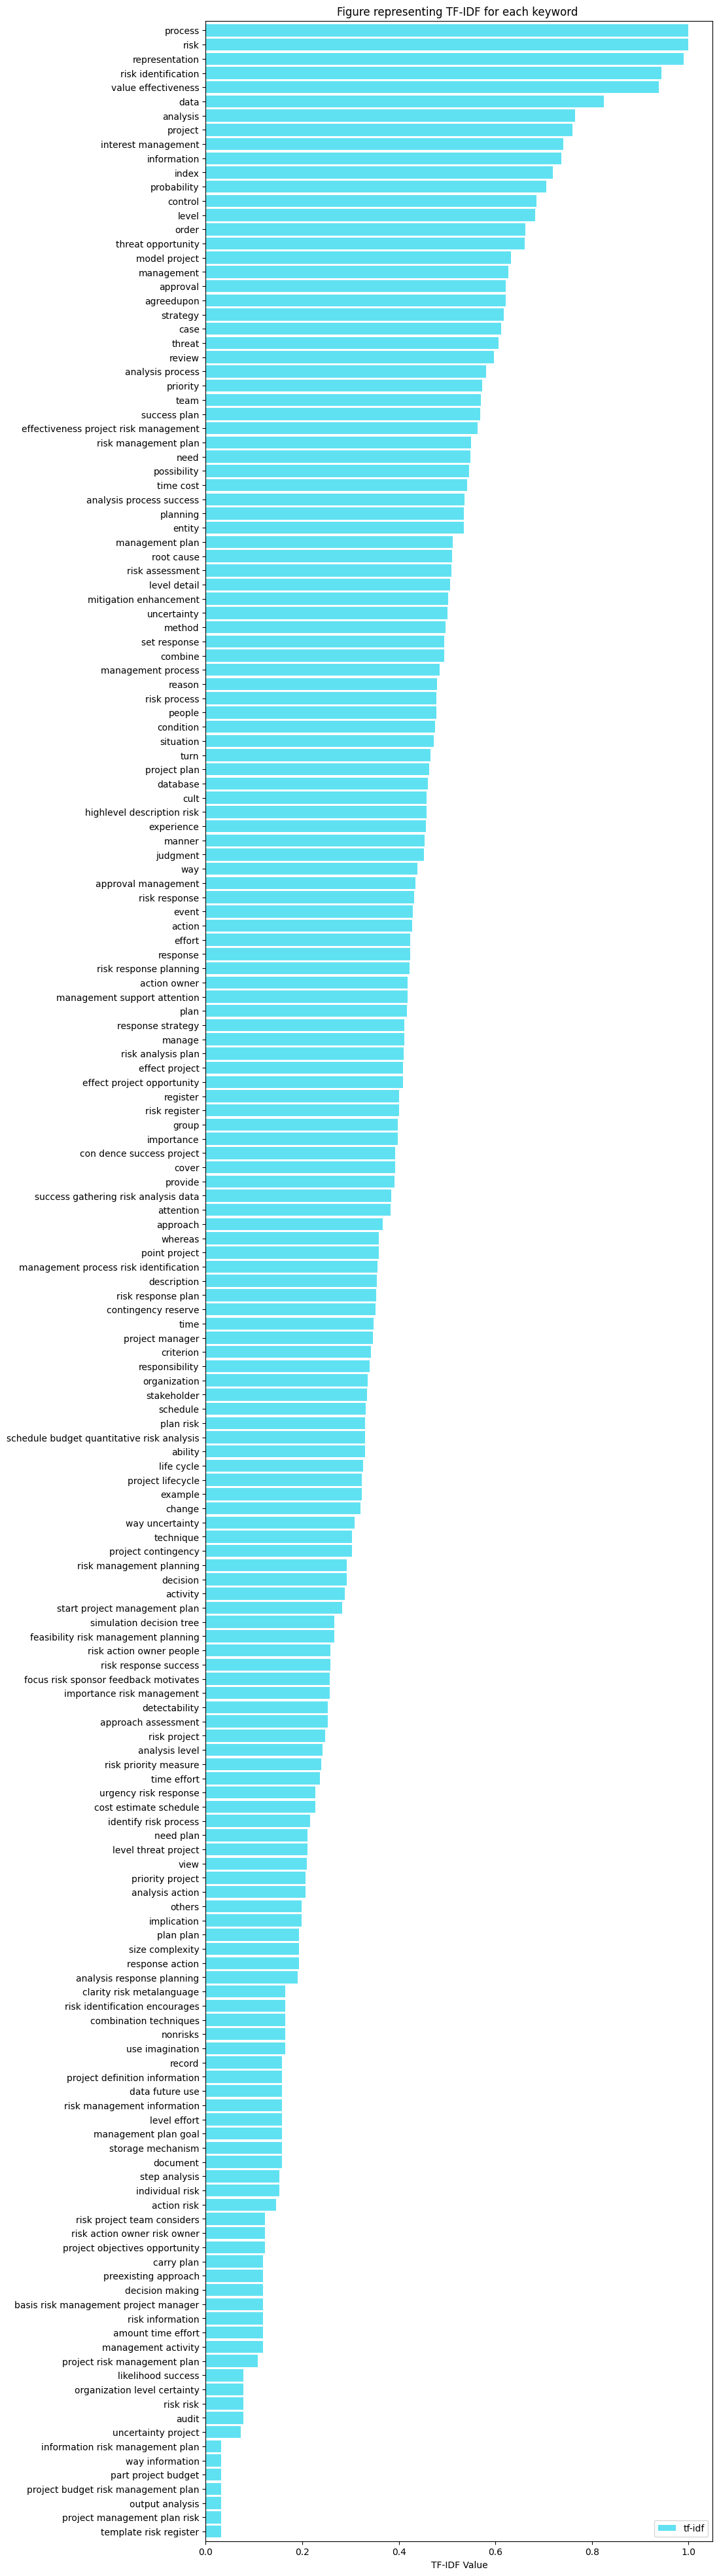

In [94]:
import matplotlib.pyplot as plt
plt.rcdefaults()
ax = df_concept_weight_filtred.plot(kind='barh', figsize=(10, 50), color='#60e1f2', zorder=2, width=0.85)

# Example data

y_pos = np.arange(df_concept_weight_filtred.shape[0])

ax.barh(y_pos, df_concept_weight_filtred['tf-idf'], align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(df_concept_weight_filtred['keyword'])
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('TF-IDF Value')
ax.set_title('Figure representing TF-IDF for each keyword ')